<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Understanding</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Add-continent-information" data-toc-modified-id="Add-continent-information-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Add continent information</a></span></li><li><span><a href="#Cleansing-nan-data" data-toc-modified-id="Cleansing-nan-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cleansing nan data</a></span></li><li><span><a href="#Education-group" data-toc-modified-id="Education-group-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Education group</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Wordcloud-for-LanguageWantToWorkWith" data-toc-modified-id="Wordcloud-for-LanguageWantToWorkWith-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Wordcloud for LanguageWantToWorkWith</a></span></li><li><span><a href="#Process-Survey-answer-:-MA-vs-Numeric-answer" data-toc-modified-id="Process-Survey-answer-:-MA-vs-Numeric-answer-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Process Survey answer : MA vs Numeric answer</a></span></li><li><span><a href="#Plot-vs-Salary" data-toc-modified-id="Plot-vs-Salary-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plot vs Salary</a></span><ul class="toc-item"><li><span><a href="#Continent" data-toc-modified-id="Continent-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Continent</a></span></li><li><span><a href="#Remote-work" data-toc-modified-id="Remote-work-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Remote work</a></span></li><li><span><a href="#Employment" data-toc-modified-id="Employment-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Employment</a></span></li><li><span><a href="#Education" data-toc-modified-id="Education-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Education</a></span></li><li><span><a href="#Education-group" data-toc-modified-id="Education-group-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Education group</a></span></li><li><span><a href="#DevType" data-toc-modified-id="DevType-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>DevType</a></span></li></ul></li><li><span><a href="#Most-important-framework" data-toc-modified-id="Most-important-framework-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Most important framework</a></span><ul class="toc-item"><li><span><a href="#Show-in-single-values" data-toc-modified-id="Show-in-single-values-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Show in single values</a></span></li><li><span><a href="#Show-all-group-of-dev_type" data-toc-modified-id="Show-all-group-of-dev_type-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Show all group of dev_type</a></span><ul class="toc-item"><li><span><a href="#Code-language" data-toc-modified-id="Code-language-3.4.2.1"><span class="toc-item-num">3.4.2.1&nbsp;&nbsp;</span>Code language</a></span></li><li><span><a href="#Working-platform" data-toc-modified-id="Working-platform-3.4.2.2"><span class="toc-item-num">3.4.2.2&nbsp;&nbsp;</span>Working platform</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#EOL" data-toc-modified-id="EOL-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EOL</a></span></li></ul></div>

In [1]:
# install adds on library of pycountry
!pip3 install pycountry --user
!pip3 install pycountry_convert --user

Looking in indexes: https://cicd-jfrog.telkomsel.co.id/artifactory/api/pypi/tsel-python-remote/simple, https://cicd-jfrog.telkomsel.co.id/artifactory/api/pypi/tsel-python-local/simple
Looking in indexes: https://cicd-jfrog.telkomsel.co.id/artifactory/api/pypi/tsel-python-remote/simple, https://cicd-jfrog.telkomsel.co.id/artifactory/api/pypi/tsel-python-local/simple


In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pycountry
import pycountry_convert as pc


Bad key backend.qt4 in file /etc/matplotlib/matplotlibrc, line 43 ('backend.qt4 : PyQt4        # PyQt4 | PySide')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


# Data Understanding

In [53]:
# Open the data
path = f'/home/cdsw/tsurvey_research/dataset/stackoverflow_research/'
sch_name = r'survey_results_schema.csv'
df_name = r'survey_results_public.csv'

# schema file
sch = pd.read_csv(path+sch_name) 
# dataframe file
df_raw = pd.read_csv(path+df_name)

In [54]:
def col_definition(df,columns):
  '''
  # function for col_definition
  in:
  df - input df
  col - target columns
  out:
  desc - string
  '''
  desc = df[df['qname']==columns]['question'].values[0]
  return desc

In [55]:
# each column info 
print(col_definition(sch,'Employment'))

Which of the following best describes your current employment status?


# Data Wrangling

## Add continent information

In [56]:
# This function used for convert country name to continent name by using pycountry and pycountry_convert library
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [57]:
# Create a map dict to map country name to continent name
country_list = df_raw['Country'].dropna().unique().tolist()

if 'Hong Kong (S.A.R.)' in country_list:
    country_list[country_list.index('Hong Kong (S.A.R.)')] = 'Hong Kong'
if 'Iran, Islamic Republic of...' in country_list:
    country_list[country_list.index('Iran, Islamic Republic of...')] = 'Iran'
if 'The former Yugoslav Republic of Macedonia' in country_list:
    country_list[country_list.index('The former Yugoslav Republic of Macedonia')] = 'Macedonia'
if 'Republic of Korea' in country_list:
    country_list[country_list.index('Republic of Korea')] = 'South Korea'
if 'Nomadic' in country_list:
    country_list.remove('Nomadic')
if 'Timor-Leste' in country_list:
    country_list.remove('Timor-Leste')
if 'Kosovo' in country_list:
    country_list.remove('Kosovo')
if 'Libyan Arab Jamahiriya' in country_list:
    country_list[country_list.index('Libyan Arab Jamahiriya')] = 'Libya'
if 'Venezuela, Bolivarian Republic of...' in country_list:
    country_list[country_list.index('Venezuela, Bolivarian Republic of...')] = 'Venezuela'
if 'Congo, Republic of the...' in country_list:
    country_list[country_list.index('Congo, Republic of the...')] = 'Congo'
if "CÃ´te d'Ivoire" in country_list:
    country_list[country_list.index("CÃ´te d'Ivoire")] = 'Ivory Coast'

country_2_dest_dict = {}
for i in country_list:
    country_2_dest_dict[i] = country_to_continent(i)

# Append some countries that are not in the pycountry package
country_2_dest_dict['Timor-Leste'] = 'Asia'
country_2_dest_dict['Kosovo'] = 'Europe'

rename_dict = {
    'Hong Kong (S.A.R.)' : 'Hong Kong',
    'Iran, Islamic Republic of...' : 'Iran',
    'The former Yugoslav Republic of Macedonia' : 'Macedonia',
    'Republic of Korea' : 'South Korea',
    'Libyan Arab Jamahiriya' : 'Libya',
    'Venezuela, Bolivarian Republic of...' : 'Venezuela',
    'Congo, Republic of the...' : 'Congo',
}

# get continent
df_raw['Country'].replace(rename_dict, inplace=True)
df_raw['Continent'] = df_raw['Country'].map(country_2_dest_dict)

## Cleansing nan data

In [58]:
# focus column
focus_col = ['ResponseId',
             'MainBranch',
             'Employment',
             'DevType',
             'RemoteWork',
             'CodingActivities',
             'EdLevel',
             'LearnCode',
             'LearnCodeCoursesCert',
             'Age',
             'Blockchain',
             'Gender',
             'ConvertedCompYearly',
             'Country',
             'Currency',
             'Continent',
             'LanguageHaveWorkedWith',
             'LanguageWantToWorkWith',
            'DatabaseHaveWorkedWith',
            'DatabaseWantToWorkWith',
            'PlatformHaveWorkedWith',
            'PlatformWantToWorkWith',
            'WebframeHaveWorkedWith',
            'WebframeWantToWorkWith',
            ]
# filter focus col 
df = df_raw[focus_col]

In [59]:
# check null values (before)
np.sum(df.isnull())

ResponseId                    0
MainBranch                    0
Employment                 1559
DevType                   11966
RemoteWork                14310
CodingActivities          14369
EdLevel                    1697
LearnCode                  1688
LearnCodeCoursesCert      43879
Age                        2322
Blockchain                 2197
Gender                     2415
ConvertedCompYearly       35197
Country                    1497
Currency                  22004
Continent                  1534
LanguageHaveWorkedWith     2293
LanguageWantToWorkWith     6241
DatabaseHaveWorkedWith    13147
DatabaseWantToWorkWith    22254
PlatformHaveWorkedWith    23344
PlatformWantToWorkWith    32853
WebframeHaveWorkedWith    19724
WebframeWantToWorkWith    27146
dtype: int64

In [60]:
# Drop rows with NA values in the selected columns
selected_columns_to_drop_na = ['ConvertedCompYearly']
df.dropna(subset=selected_columns_to_drop_na, inplace=True)

/home/cdsw/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
# fill nan value with No answer
df = df.fillna("No answer")

## Education group

In [62]:
# Replace values
mainbranch_dict = {
    "I am a developer by profession": "Professional developer",
    "I am learning to code": "Learn to code",
    "I am not primarily a developer, but I write code sometimes as part of my work"  : "Ability to code",
    "I code primarily as a hobby": "Ability to code",
    "I used to be a developer by profession, but no longer am": "Ability to code",
    "None of these" : "None",
    "No answer":"None" }

edu_dict = {
    "Something else": "No answer",
    "Associate degree (A.A., A.S., etc.)": "Below bachelor",
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master",
    "Other doctoral degree (Ph.D., Ed.D., etc.)": "Doctoral",
    "Professional degree (JD, MD, etc.)": "Professional degree",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Below bachelor",
    "Some college/university study without earning a degree": "Below bachelor",
    "Primary/elementary school": "Below bachelor",
}

df["EdLevel_group"] = df["EdLevel"].replace(edu_dict)
df["MainBranch_group"] = df["MainBranch"].replace(edu_dict)

In [63]:
# values after replacement
df.EdLevel_group.value_counts()

Bachelor               18056
Master                  9877
Below bachelor          7772
Doctoral                1366
Professional degree      624
No answer                376
Name: EdLevel_group, dtype: int64

In [64]:
# drop outlier 
high_school_index = df[(df['EdLevel']=='Primary/elementary school')&(df['ConvertedCompYearly']>500000)].index
df.drop(high_school_index, inplace = True)

# EDA

## Wordcloud for LanguageWantToWorkWith

In [383]:
# Transform multianswer values into a single column
word_cloud = df[['LanguageWantToWorkWith']].assign(Language=df['LanguageWantToWorkWith'].str.split(';')).explode('Language')
word_cloud.drop(columns='LanguageWantToWorkWith', inplace=True)

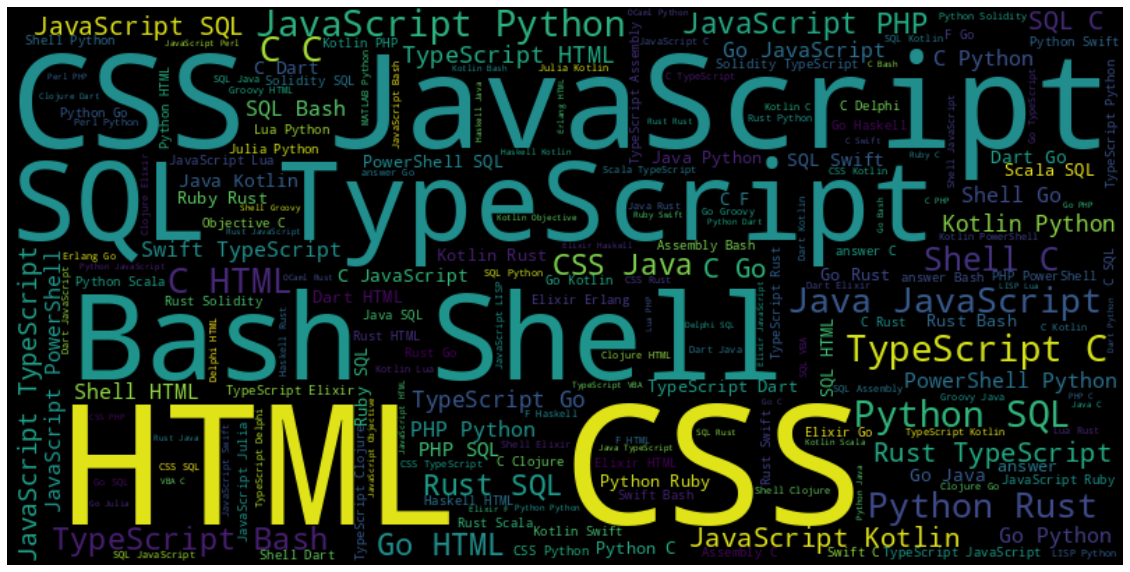

In [384]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Prepare text data
text_data = word_cloud['Language'].str.cat(sep=',')

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# Create a larger figure for the word cloud

In [385]:
# filter data group
data_group = df[df['DevType'].str.contains('Scientist|Data or business analyst|Data scientist or machine learning specialist|Engineer, data')]
# Transform multianswer values into a single column
word_cloud = data_group[['LanguageHaveWorkedWith']].assign(Language=data_group['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
word_cloud.drop(columns='LanguageHaveWorkedWith', inplace=True)

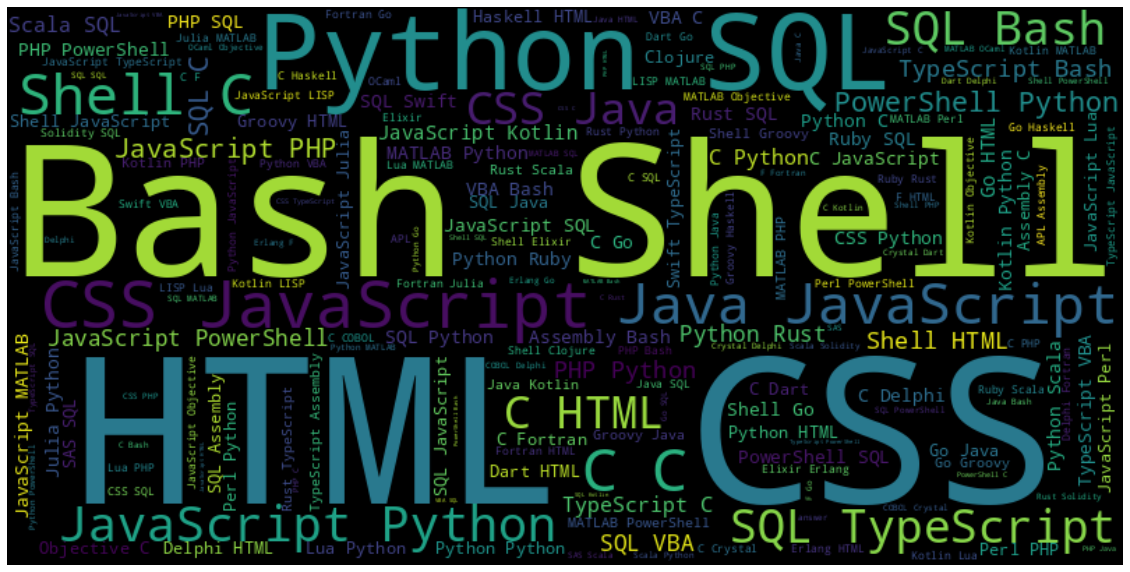

In [386]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Prepare text data
text_data = word_cloud['Language'].str.cat(sep=';')

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# Create a larger figure for the word cloud

## Process Survey answer : MA vs Numeric answer

In [65]:
#Now we want to see how often each of these individual values appears - I wrote 
# this function to assist with process - it isn't the best solution, but it gets
# the job done and our dataset isn't large enough to computationally hurt us too much.

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up 
    '''
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])   
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [107]:
# Let's have a look at what the participants say
# count dev_type
possible_val = df['DevType'].str.split(';').explode().unique()
dev_type = df['DevType'].value_counts().reset_index()

dev_type.rename(columns={'index': 'dev_type', 'DevType': 'count'}, inplace=True)
dev_type.head()

dev_type = total_count(dev_type, 'dev_type', 'count', possible_val)
dev_type

,dev_type,count
4,"Developer, full-stack",18813
5,"Developer, back-end",17674
1,"Developer, front-end",9911
9,"Developer, desktop or enterprise applications",6062
10,"Developer, mobile",4511
8,DevOps specialist,4362
15,Cloud infrastructure engineer,3786
14,Database administrator,3144
22,System administrator,2973
6,Engineering manager,2433


In [67]:
#Let's have a look at what the participants say
possible_val = df['Continent'].str.split(';').explode().unique()
study = df['Continent'].value_counts().reset_index()
# Oh this isn't what I was expecting, it is grouping items together if a participant provided 
# more than just one answer.  Let's see if we can clean this up.
# first to change this index column to a more appropriate name
study.rename(columns={'index': 'Continent', 'Continent': 'count'}, inplace=True)
study.head()

,Continent,count
0,Europe,17313
1,North America,10751
2,Asia,5761
3,South America,2187
4,Oceania,1121


In [68]:
def mean_amt(df, col_name, col_mean):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col_name - the column name you want to look through
    col_count - the column you want to count values from
    col_mean - the column you want the mean amount for
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    df_all - holds sum, square, total, mean, variance, and standard deviation for the col_mean
    '''
    look_for = df[col_name].str.split(';').explode().unique()
    new_df = defaultdict(int)
    squares_df = defaultdict(int)
    denoms = dict()
    df[col_name] = df[col_name].astype(str)
    for val in look_for:
        denoms[val] = 0
        for idx in range(df.shape[0]):
            if df[col_name].isnull().iat[idx] == False:
                if val in df[col_name].iat[idx] and df[col_mean].iat[idx] > 0:
                    new_df[val] += df[col_mean].iat[idx]
                    squares_df[val] += df[col_mean].iat[idx]**2 #Needed to understand the spread
                    denoms[val] += 1 
    
    # Turn into dataframes
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    squares_df = pd.DataFrame(pd.Series(squares_df)).reset_index()
    denoms = pd.DataFrame(pd.Series(denoms)).reset_index()
    
    # Change the column names
    new_df.columns = [col_name, 'col_sum']
    squares_df.columns = [col_name, 'col_squares']
    denoms.columns = [col_name, 'col_total']
    
    # Merge dataframes
    df_means = pd.merge(new_df, denoms)
    df_all = pd.merge(df_means, squares_df)
    
    # Additional columns needed for analysis
    df_all['mean_col'] = df_means['col_sum']/df_means['col_total']
    df_all['var_col'] = df_all['col_squares']/df_all['col_total'] - df_all['mean_col']**2
    df_all['std_col'] = np.sqrt(df_all['var_col'])
    df_all['lower_95'] = df_all['mean_col'] - 1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
    df_all['upper_95'] = df_all['mean_col'] + 1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
    return df_all

In [393]:
%%time
# continent vs salary
continent_v_sal= mean_amt(df[df['Continent']!='No answer'], 'Continent', 'ConvertedCompYearly')

# To get a simple answer to our questions - see these two tables.
continent_v_sal.sort_values('mean_col', ascending=False)

/home/cdsw/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 5min 6s, sys: 1.06 s, total: 5min 7s
Wall time: 5min 6s


,Continent,col_sum,col_total,col_squares,mean_col,var_col,std_col,lower_95,upper_95
2,North America,3.721208e+09,10756,1.695146e+16,345965.758646,1.456308e+12,1.206776e+06,323159.331179,368772.186114
5,Oceania,2.559968e+08,1121,6.050375e+14,228364.675290,4.875797e+11,6.982691e+05,187487.951566,269241.399013
0,Europe,2.024656e+09,17315,5.710354e+15,116930.758013,3.161195e+11,5.622451e+05,108556.034504,125305.481523
1,Asia,3.640308e+08,5762,1.053072e+15,63177.850226,1.787700e+11,4.228121e+05,52260.511034,74095.189417
4,South America,9.906641e+07,2187,2.758528e+13,45297.856882,1.056140e+10,1.027687e+05,40990.682706,49605.031057
3,Africa,3.346366e+07,914,6.596734e+12,36612.323851,5.876971e+09,7.666141e+04,31642.285279,41582.362423


In [394]:
%%time
# remote_work vs salary
remote_work= mean_amt(df[df['RemoteWork']!='No answer'], 'RemoteWork', 'ConvertedCompYearly')

# To get a simple answer to our questions - see these two tables.
remote_work.sort_values('mean_col', ascending=False)

/home/cdsw/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 2min 34s, sys: 573 ms, total: 2min 34s
Wall time: 2min 34s


,RemoteWork,col_sum,col_total,col_squares,mean_col,var_col,std_col,lower_95,upper_95
1,Fully remote,3.397140e+09,17451,1.123268e+16,194667.355223,6.057743e+11,778315.067485,183119.499475,206215.210971
0,"Hybrid (some remote, some in-person)",2.547168e+09,15997,8.893850e+15,159227.885228,5.306164e+11,728434.185389,147939.622263,170516.148194
2,Full in-person,5.084648e+08,4567,3.290869e+15,111334.536019,7.081803e+11,841534.508609,86927.643129,135741.428909


In [395]:
%%time
employment= mean_amt(df[df['Employment']!='No answer'], 'Employment', 'ConvertedCompYearly')

# To get a simple answer to our questions - see these two tables.
employment.sort_values('Employment', ascending=False)

/home/cdsw/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 4min 15s, sys: 1.14 s, total: 4min 17s
Wall time: 4min 16s


,Employment,col_sum,col_total,col_squares,mean_col,var_col,std_col,lower_95,upper_95
4,Retired,3.852487e+06,31,1.873009e+12,1.242738e+05,4.497568e+10,2.120747e+05,49617.883908,1.989297e+05
1,"Independent contractor, freelancer, or self-em...",9.060987e+08,5723,5.329062e+15,1.583258e+05,9.060988e+11,9.518922e+05,133663.608060,1.829880e+05
3,I prefer not to say,4.545946e+07,28,9.375771e+14,1.623552e+06,3.084898e+13,5.554185e+06,-433746.940095,3.680851e+06
2,"Employed, part-time",9.647125e+07,1120,9.706131e+13,8.613504e+04,7.924263e+10,2.815007e+05,69648.616989,1.026215e+05
0,"Employed, full-time",5.910236e+09,34416,1.905315e+16,1.717293e+05,5.241221e+11,7.239628e+05,164080.526373,1.793781e+05


In [42]:
%%time
edu_vs_sal= mean_amt(df[df['EdLevel']!='No answer'], 'EdLevel', 'ConvertedCompYearly')

# To get a simple answer to our questions - see these two tables.
edu_vs_sal.sort_values('EdLevel', ascending=False)

/home/cdsw/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 7min 39s, sys: 1.53 s, total: 7min 40s
Wall time: 7min 39s


,EdLevel,col_sum,col_total,col_squares,mean_col,var_col,std_col,lower_95,upper_95
3,Something else,4.850491e+07,359,1.246088e+14,135111.158774,3.288448e+11,5.734499e+05,75790.720976,194431.596572
5,Some college/university study without earning ...,7.177612e+08,4497,1.987245e+15,159608.905270,4.164295e+11,6.453135e+05,140747.876440,178469.934100
2,"Secondary school (e.g. American high school, G...",2.556229e+08,1776,2.726439e+15,143931.798423,1.514441e+12,1.230626e+06,86696.927379,201166.669468
6,"Professional degree (JD, MD, etc.)",5.114228e+07,624,1.833193e+13,81958.780449,2.266085e+10,1.505352e+05,70147.367603,93770.193295
8,Primary/elementary school,1.599583e+07,218,2.111545e+12,73375.357798,4.302041e+09,6.558995e+04,64668.426629,82082.288967
7,"Other doctoral degree (Ph.D., Ed.D., etc.)",2.666077e+08,1366,6.886060e+14,195173.994876,4.660111e+11,6.826500e+05,158972.305844,231375.683907
0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",1.538183e+09,9877,2.983152e+15,155733.868786,2.777772e+11,5.270457e+05,145339.650873,166128.086699
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3.308113e+09,18056,1.404370e+16,183214.077204,7.442182e+11,8.626808e+05,170630.751504,195797.402904
4,"Associate degree (A.A., A.S., etc.)",2.452455e+08,1273,8.107368e+14,192651.583661,5.997564e+11,7.744394e+05,150108.467368,235194.699954


In [397]:
%%time
dev_type_v_sal = mean_amt(df[df['DevType']!='No answer'], 'DevType', 'ConvertedCompYearly')

# To get a simple answer to our questions - see these two tables.
dev_type_v_sal.sort_values('mean_col', ascending=False)

/home/cdsw/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 28min 7s, sys: 3.99 s, total: 28min 11s
Wall time: 28min 9s


,DevType,col_sum,col_total,col_squares,mean_col,var_col,std_col,lower_95,upper_95
23,Marketing or sales professional,8.863272e+07,217,2.569449e+15,408445.737327,1.167395e+13,3.416716e+06,-46160.199816,863051.674470
21,"Senior Executive (C-Suite, VP, etc.)",3.350576e+08,1061,3.203043e+15,315794.133836,2.919165e+12,1.708556e+06,212985.951555,418602.316117
28,Blockchain,2.182213e+08,701,2.977858e+15,311299.987161,4.151106e+12,2.037426e+06,160473.027437,462126.946885
3,"Engineer, site reliability",3.470236e+08,1330,4.147672e+15,260920.000752,3.050471e+12,1.746560e+06,167052.829301,354787.172203
15,Cloud infrastructure engineer,9.796002e+08,3788,7.257373e+15,258606.165259,1.849008e+12,1.359782e+06,215302.914671,301909.415846
6,Engineering manager,5.851583e+08,2434,3.760576e+15,240410.145029,1.487222e+12,1.219517e+06,191961.272585,288859.017472
26,Other (please specify):,2.858047e+08,1295,3.098593e+15,220698.644015,2.344028e+12,1.531022e+06,137310.834837,304086.453194
12,"Developer, game or graphics",2.108334e+08,966,2.911614e+15,218254.064182,2.966459e+12,1.722341e+06,109639.853533,326868.274832
2,"Engineer, data",4.971750e+08,2343,3.887216e+15,212195.909518,1.614049e+12,1.270452e+06,160752.670849,263639.148186
25,Security professional,2.365552e+08,1141,5.288892e+14,207322.709904,4.205486e+11,6.484972e+05,169693.825919,244951.593889


In [46]:
%%time
# continent vs salary
ed_group_v_sal= mean_amt(df[df['EdLevel_group']!='No answer'], 'EdLevel_group', 'ConvertedCompYearly')

# To get a simple answer to our questions - see these two tables.
ed_group_v_sal.sort_values('mean_col', ascending=False)

/home/cdsw/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 4min 11s, sys: 798 ms, total: 4min 12s
Wall time: 4min 11s


,EdLevel_group,col_sum,col_total,col_squares,mean_col,var_col,std_col,lower_95,upper_95
4,Doctoral,2.666077e+08,1366,6.886060e+14,195173.994876,4.660111e+11,682650.027150,158972.305844,231375.683907
1,Bachelor,3.308113e+09,18056,1.404370e+16,183214.077204,7.442182e+11,862680.814037,170630.751504,195797.402904
2,Below bachelor,1.234625e+09,7764,5.526532e+15,159019.244590,6.865279e+11,828569.778389,140588.520548,177449.968633
0,Master,1.538183e+09,9877,2.983152e+15,155733.868786,2.777772e+11,527045.698329,145339.650873,166128.086699
3,Professional degree,5.114228e+07,624,1.833193e+13,81958.780449,2.266085e+10,150535.203228,70147.367603,93770.193295


## Plot vs Salary

### Continent

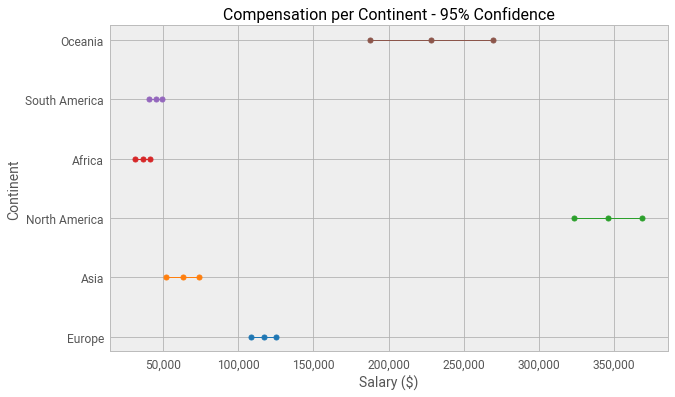

In [406]:
# source
df_to_plot = continent_v_sal.set_index('Continent')

# function
def plot_continent_compensation(continent_v_sal):
    # Set the 'Continent' column as the index
    
    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the lines for min, max, and avg values for each continent
    for i, continent in enumerate(continent_v_sal.index):
        x = [continent_v_sal.loc[continent, 'lower_95'], continent_v_sal.loc[continent, 'mean_col'], continent_v_sal.loc[continent, 'upper_95']]
        y = [i, i, i]
        ax.plot(x, y, marker='o', markersize=5)

    # Set y-axis ticks and labels
    ax.set_yticks(range(len(continent_v_sal.index)))
    ax.set_yticklabels(continent_v_sal.index, fontsize=12)

    # Set labels and title
    ax.set_xlabel('Salary ($)', fontsize=14)
    ax.set_ylabel('Continent', fontsize=14)
    ax.set_title('Compensation per Continent - 95% Confidence', fontsize=16)

    # Format y-axis tick labels with comma separators
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.tick_params(axis='x', labelsize=12)
    
    # Show the plot
    plt.show()

    # plot
plot_continent_compensation(df_to_plot)

### Remote work

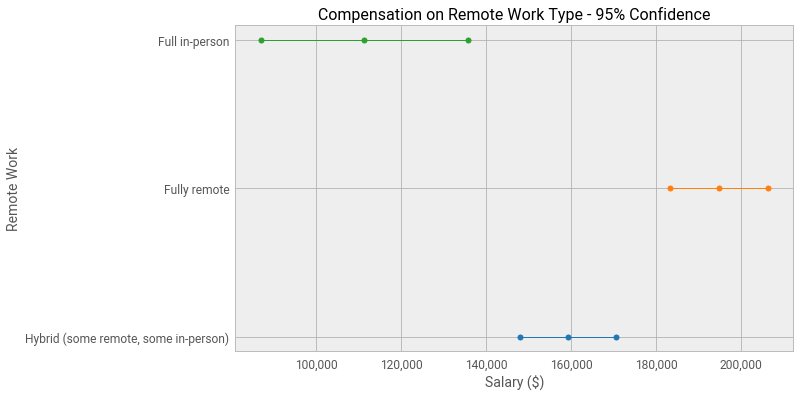

In [400]:
# source
df_to_plot = remote_work.set_index('RemoteWork')

# function
def plot_continent_compensation(continent_v_sal):
    # Set the 'Continent' column as the index
    
    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the lines for min, max, and avg values for each continent
    for i, continent in enumerate(continent_v_sal.index):
        x = [continent_v_sal.loc[continent, 'lower_95'], continent_v_sal.loc[continent, 'mean_col'], continent_v_sal.loc[continent, 'upper_95']]
        y = [i, i, i]
        ax.plot(x, y, marker='o', markersize=5)

    # Set y-axis ticks and labels
    ax.set_yticks(range(len(continent_v_sal.index)))
    ax.set_yticklabels(continent_v_sal.index, fontsize=12)

    # Set labels and title
    ax.set_xlabel('Salary ($)', fontsize=14)
    ax.set_ylabel('Remote Work', fontsize=14)
    ax.set_title('Compensation on Remote Work Type - 95% Confidence', fontsize=16)

    # Format y-axis tick labels with comma separators
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.tick_params(axis='x', labelsize=12)
    
    # Show the plot
    plt.show()

    # plot
plot_continent_compensation(df_to_plot)

### Employment

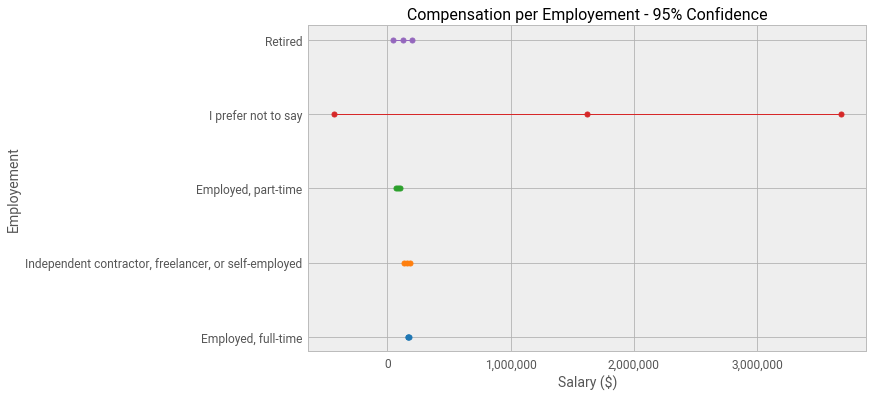

In [401]:
# df to plot
df_to_plot = employment.set_index('Employment')

def plot_continent_compensation(continent_v_sal):
    # Set the 'Continent' column as the index
    
    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the lines for min, max, and avg values for each continent
    for i, continent in enumerate(continent_v_sal.index):
        x = [continent_v_sal.loc[continent, 'lower_95'], continent_v_sal.loc[continent, 'mean_col'], continent_v_sal.loc[continent, 'upper_95']]
        y = [i, i, i]
        ax.plot(x, y, marker='o', markersize=5)

    # Set y-axis ticks and labels
    ax.set_yticks(range(len(continent_v_sal.index)))
    ax.set_yticklabels(continent_v_sal.index, fontsize=12)

    # Set labels and title
    ax.set_xlabel('Salary ($)', fontsize=14)
    ax.set_ylabel('Employement', fontsize=14)
    ax.set_title('Compensation per Employement - 95% Confidence', fontsize=16)

    # Format y-axis tick labels with comma separators
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.tick_params(axis='x', labelsize=12)
    
    # Show the plot
    plt.show()

plot_continent_compensation(df_to_plot)

### Education

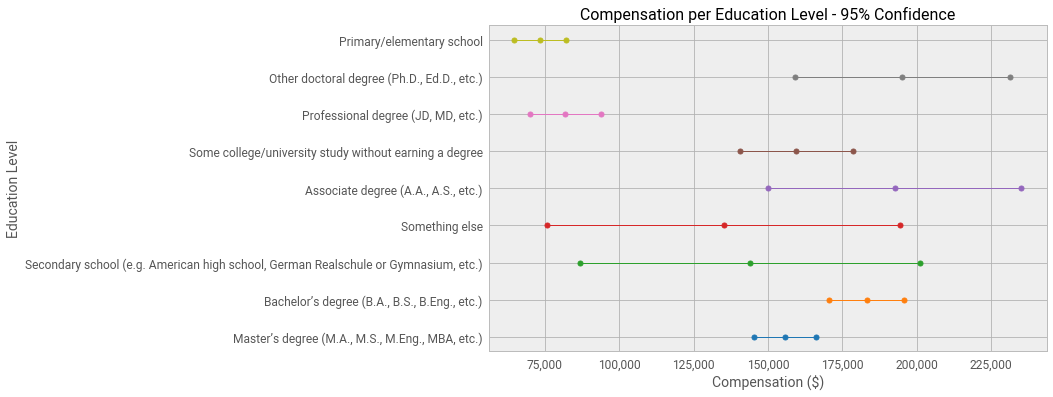

In [43]:
# target to plot
df_to_plot = edu_vs_sal.set_index('EdLevel')

def plot_continent_compensation(continent_v_sal):
    # Set the 'Continent' column as the index
    
    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the lines for min, max, and avg values for each continent
    for i, continent in enumerate(continent_v_sal.index):
        x = [continent_v_sal.loc[continent, 'lower_95'], continent_v_sal.loc[continent, 'mean_col'], continent_v_sal.loc[continent, 'upper_95']]
        y = [i, i, i]
        ax.plot(x, y, marker='o', markersize=5)

    # Set y-axis ticks and labels
    ax.set_yticks(range(len(continent_v_sal.index)))
    ax.set_yticklabels(continent_v_sal.index, fontsize=12)

    # Set labels and title
    ax.set_xlabel('Compensation ($)', fontsize=14)
    ax.set_ylabel('Education Level', fontsize=14)
    ax.set_title('Compensation per Education Level - 95% Confidence', fontsize=16)

    # Format y-axis tick labels with comma separators
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.tick_params(axis='x', labelsize=12)
    
    # Show the plot
    plt.show()

plot_continent_compensation(df_to_plot)

### Education group

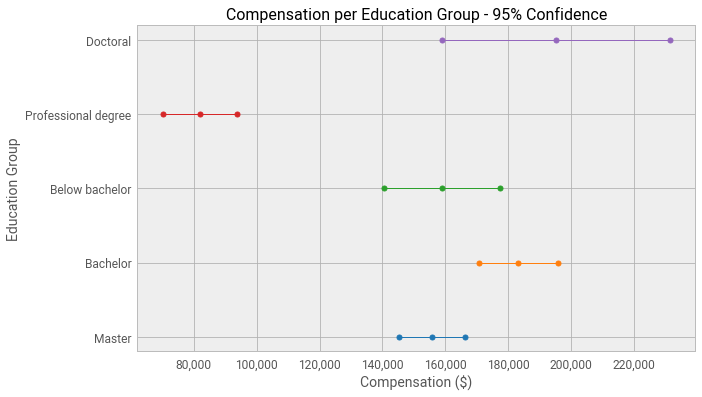

In [69]:
# target to plot
df_to_plot = ed_group_v_sal.set_index('EdLevel_group')

def plot_continent_compensation(continent_v_sal):
    # Set the 'Continent' column as the index
    
    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the lines for min, max, and avg values for each continent
    for i, continent in enumerate(continent_v_sal.index):
        x = [continent_v_sal.loc[continent, 'lower_95'], continent_v_sal.loc[continent, 'mean_col'], continent_v_sal.loc[continent, 'upper_95']]
        y = [i, i, i]
        ax.plot(x, y, marker='o', markersize=5)

    # Set y-axis ticks and labels
    ax.set_yticks(range(len(continent_v_sal.index)))
    ax.set_yticklabels(continent_v_sal.index, fontsize=12)

    # Set labels and title
    ax.set_xlabel('Compensation ($)', fontsize=14)
    ax.set_ylabel('Education Group', fontsize=14)
    ax.set_title('Compensation per Education Group - 95% Confidence', fontsize=16)

    # Format y-axis tick labels with comma separators
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.tick_params(axis='x', labelsize=12)
    
    # Show the plot
    plt.show()

plot_continent_compensation(df_to_plot)

### DevType

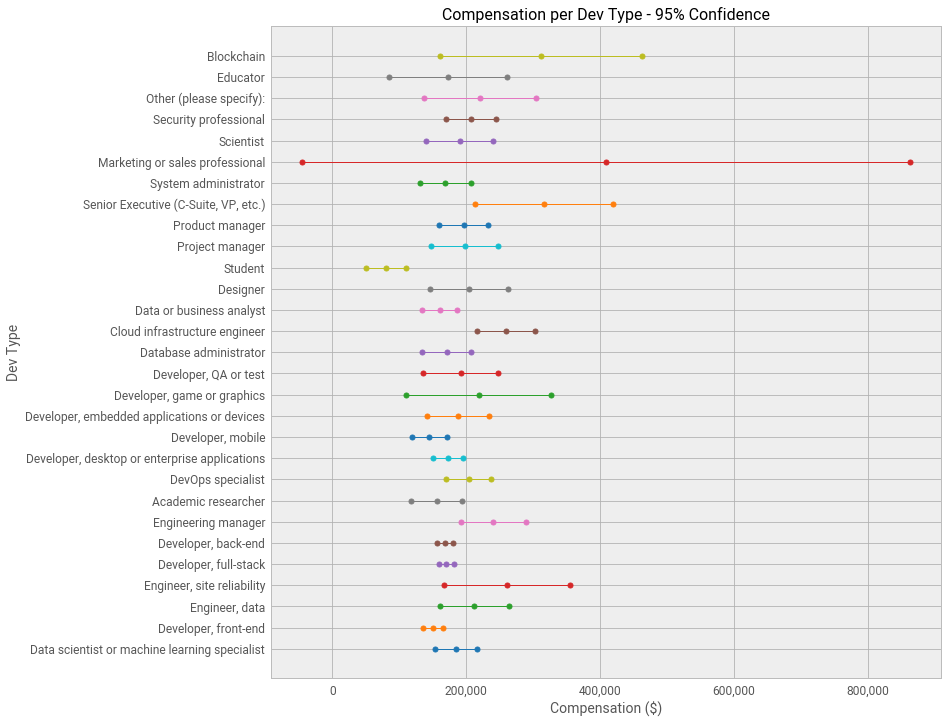

In [409]:
# target to plot
df_to_plot = dev_type_v_sal.set_index('DevType')

def plot_continent_compensation(continent_v_sal):
    # Set the 'Continent' column as the index
    
    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(12, 12))

    # Plot the lines for min, max, and avg values for each continent
    for i, continent in enumerate(continent_v_sal.index):
        x = [continent_v_sal.loc[continent, 'lower_95'], continent_v_sal.loc[continent, 'mean_col'], continent_v_sal.loc[continent, 'upper_95']]
        y = [i, i, i]
        ax.plot(x, y, marker='o', markersize=5)

    # Set y-axis ticks and labels
    ax.set_yticks(range(len(continent_v_sal.index)))
    ax.set_yticklabels(continent_v_sal.index, fontsize=12)

    # Set labels and title
    ax.set_xlabel('Compensation ($)', fontsize=14)
    ax.set_ylabel('Dev Type', fontsize=14)
    ax.set_title('Compensation per Dev Type - 95% Confidence', fontsize=16)

    # Format y-axis tick labels with comma separators
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.tick_params(axis='x', labelsize=12)
    
    # Show the plot
    plt.show()

plot_continent_compensation(df_to_plot)

## Most important framework

### Show in single values

In [77]:
# duplicate data to df_framework called df_f
df_f = df.copy()
# Split the values in LanguageWanttoWork column
df_f['LanguageWantToWorkWith'] = df_f['LanguageWantToWorkWith'].str.split(';')

# Pivot table for Top 2 DS LanguageWanttoWork
# pivot_want = df[df['DevType'] == 'DS'].explode('LanguageWantToWorkWith').groupby('LanguageWantToWorkWith').size().nlargest(2)
pivot_want = df_f.explode('LanguageWantToWorkWith').groupby('LanguageWantToWorkWith').size().nlargest(5)
pivot_want = pivot_want / pivot_want.sum()

print("Top 2 DS LanguageWantToWorkWith")
print(pivot_want)

# Split the values in LanguageHaveWork column
df_f['LanguageHaveWorkedWith'] = df_f['LanguageHaveWorkedWith'].str.split(';')

# Pivot table for Top 2 DS LanguageHaveWork
pivot_have = df_f.explode('LanguageHaveWorkedWith').groupby('LanguageHaveWorkedWith').size().nlargest(5)
pivot_have = pivot_have / pivot_have.sum()

print("Top 2 DS LanguageHaveWorkedWith")
print(pivot_have)

Top 2 DS LanguageWantToWorkWith
LanguageWantToWorkWith
JavaScript    0.226342
TypeScript    0.205611
Python        0.196690
SQL           0.191219
HTML/CSS      0.180139
dtype: float64
Top 2 DS LanguageHaveWorkedWith
LanguageHaveWorkedWith
JavaScript    0.259531
HTML/CSS      0.208791
SQL           0.207976
Python        0.168117
TypeScript    0.155584
dtype: float64


### Show all group of dev_type

In [122]:
def create_bar_charts(df_f, job_types, target_col_to_show, n_largest_show):
    '''
    INPUT:
    df_f - the pandas dataframe you want to search
    job_types - list of available type
    target_col_to_show - select A B column
    n_largest_show - filter top n to show
    
    OUTPUT:
    plot - bar chart with top n information
    '''
    
    # Create the bar charts for each job type
    for job in job_types:
        # Filter the data for the current job type
        filtered_df = df_f[df_f['DevType'].str.contains(job)]
        
        # Pivot table for A graph
        pivot_want = filtered_df.explode(target_col_to_show[0]).groupby(target_col_to_show[0]).size().nlargest(n_largest_show)
        pivot_want = pivot_want / pivot_want.sum() * 100

        # Pivot table for B graph
        pivot_have = filtered_df.explode(target_col_to_show[1]).groupby(target_col_to_show[1]).size().nlargest(n_largest_show)
        pivot_have = pivot_have / pivot_have.sum() * 100

        # Create the bar chart
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

        # Bar chart for A graph
        bars1 = axes[0].bar(pivot_have.index, pivot_have.values)
        axes[0].set_title('Top 5 ' +target_col_to_show[0]+" "+ job, fontsize=12)  # Update the title based on job type
        axes[0].set_xlabel('Language', fontsize=12)
        axes[0].set_ylabel('Percentage', fontsize=12)
        axes[0].set_ylim(0, 100)  # Set y-axis limit to 0-100

        # Bar chart for B graph
        bars2 = axes[1].bar(pivot_want.index, pivot_want.values)
        axes[1].set_title('Top 5 ' +target_col_to_show[1]+" "+ job, fontsize=12)  # Update the title based on job type
        axes[1].set_xlabel('Language', fontsize=12)
        axes[1].set_ylabel('Percentage', fontsize=12)
        axes[1].set_ylim(0, 100)  # Set y-axis limit to 0-100

        # Function to add bar values as percentages
        def add_bar_values(bars, ax, fontsize=12):
            for bar in bars:
                height = bar.get_height()
                ax.annotate(f'{height:.1f}%',  # Format the value as percentage with 1 decimal place
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # Offset the text vertically by 3 points
                            textcoords='offset points',
                            ha='center', va='bottom', fontsize=fontsize)

        # Add bar values to the chart
        add_bar_values(bars1, axes[0])
        add_bar_values(bars2, axes[1])

        for ax in axes:
            ax.tick_params(axis='x', labelsize=12)
            ax.tick_params(axis='y', labelsize=12)

        # Adjust the layout
        plt.tight_layout()

        # Show the bar chart
        plt.show()

#### Code language

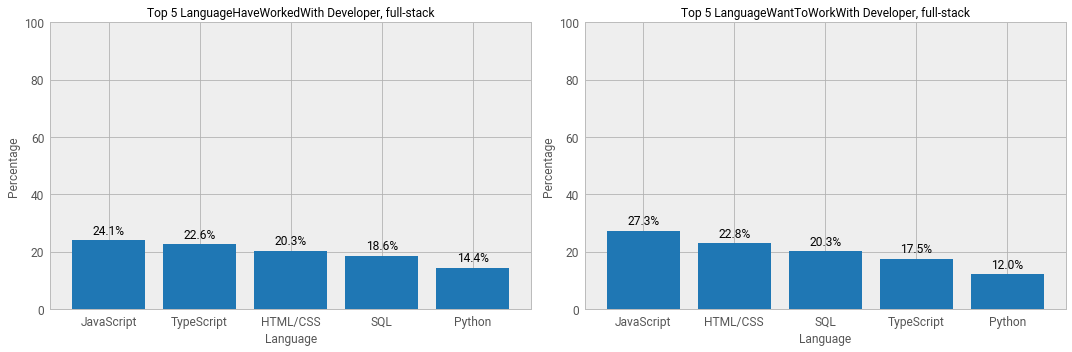

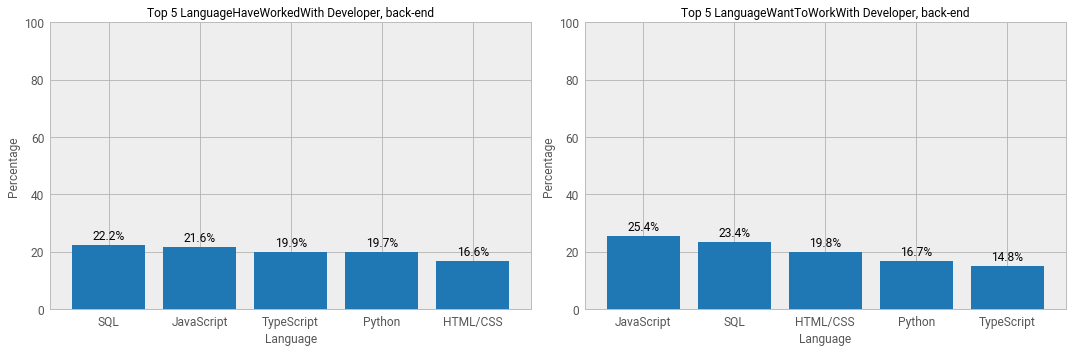

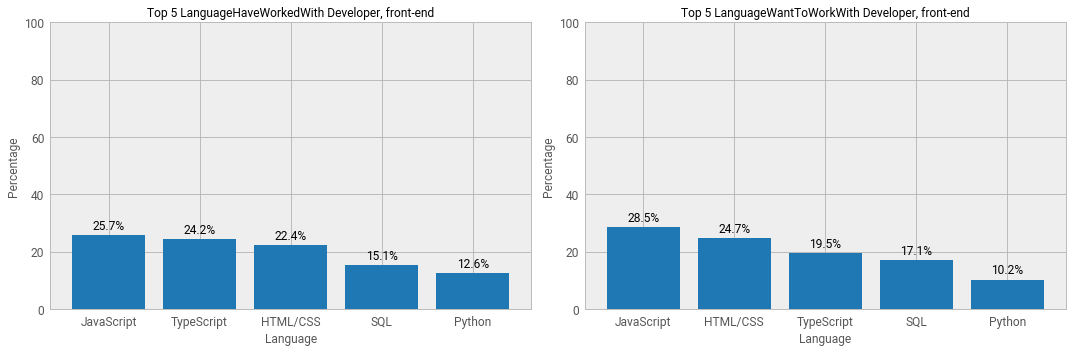

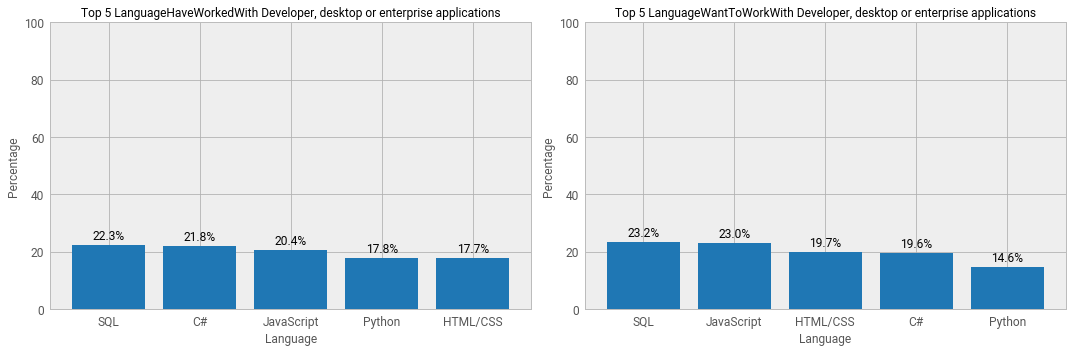

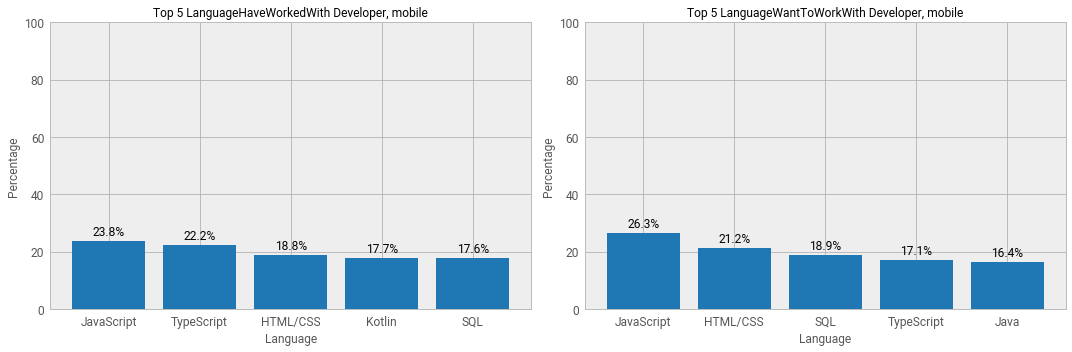

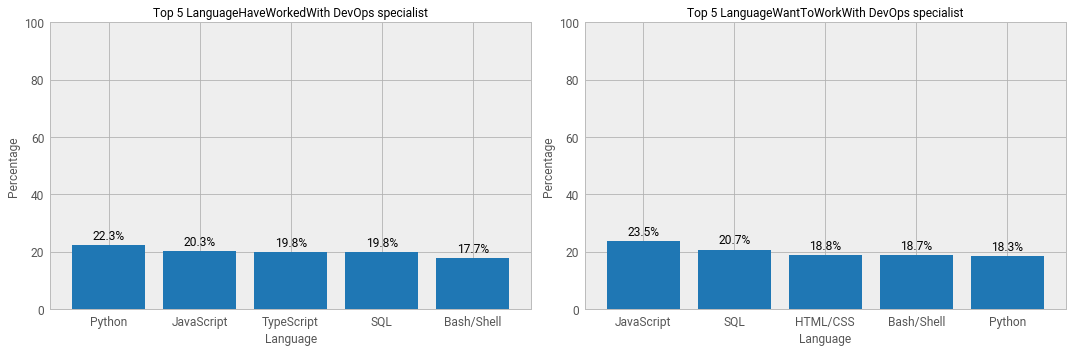

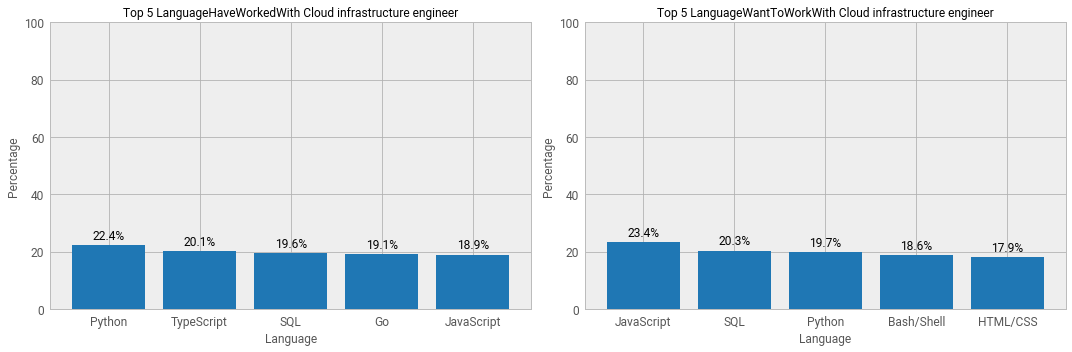

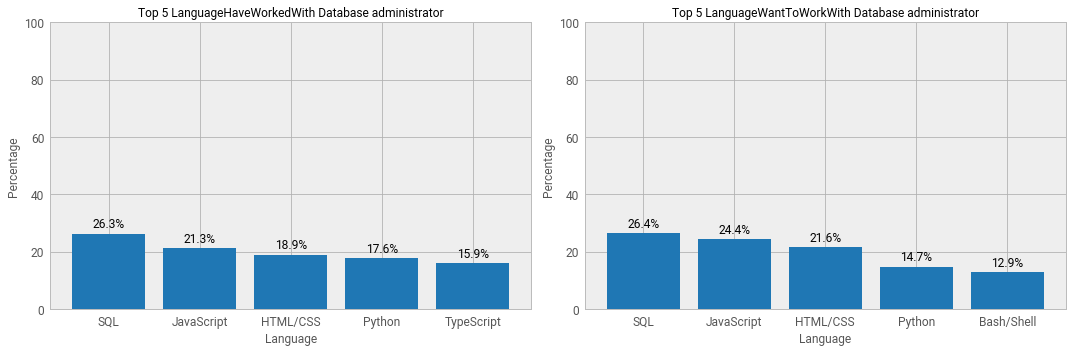

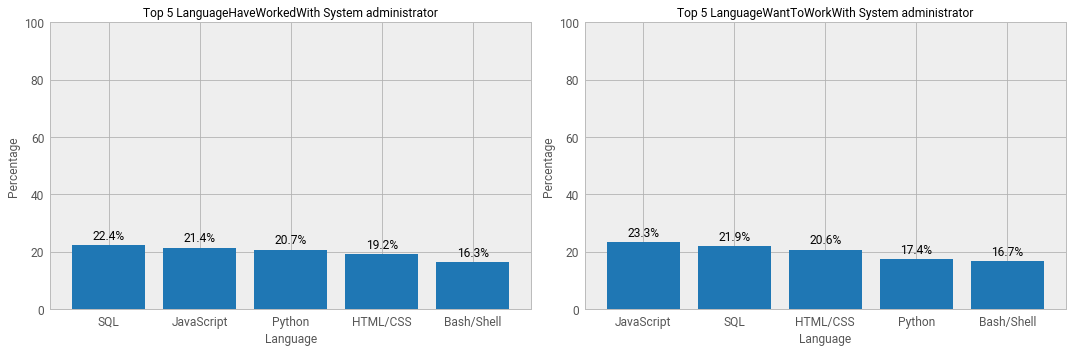

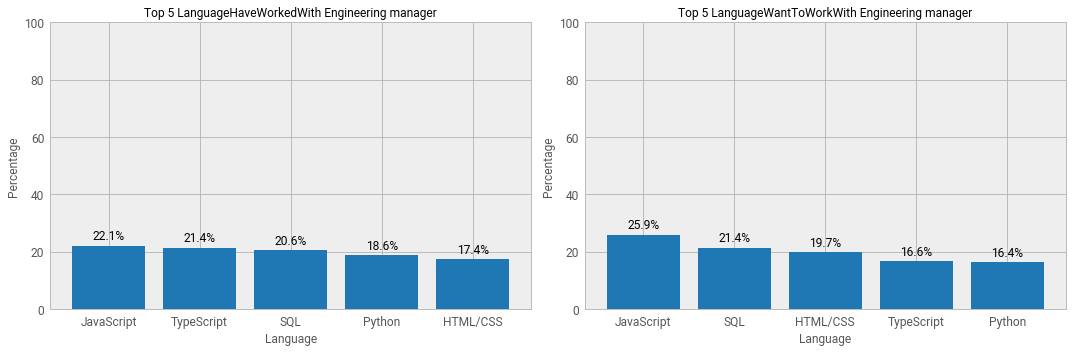

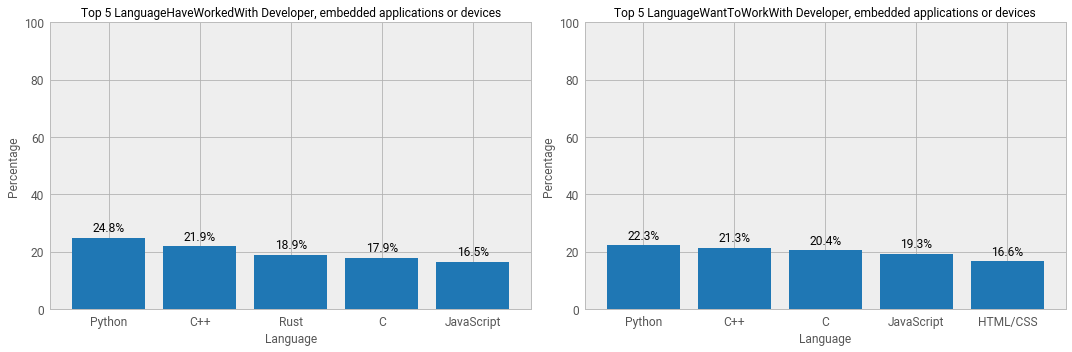

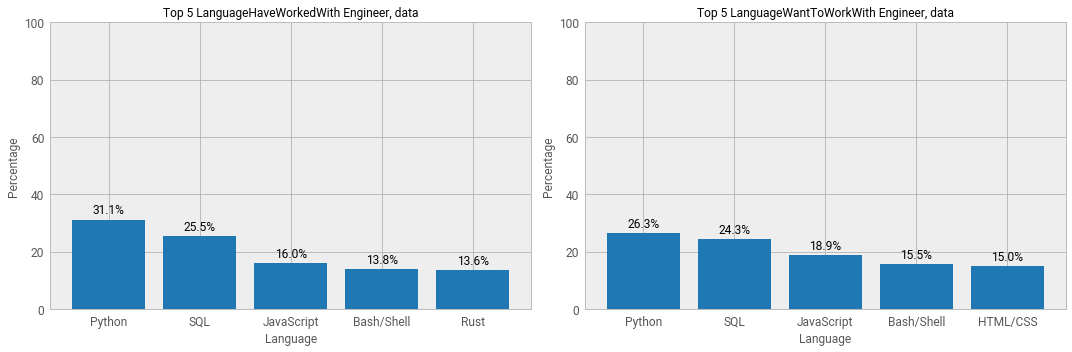

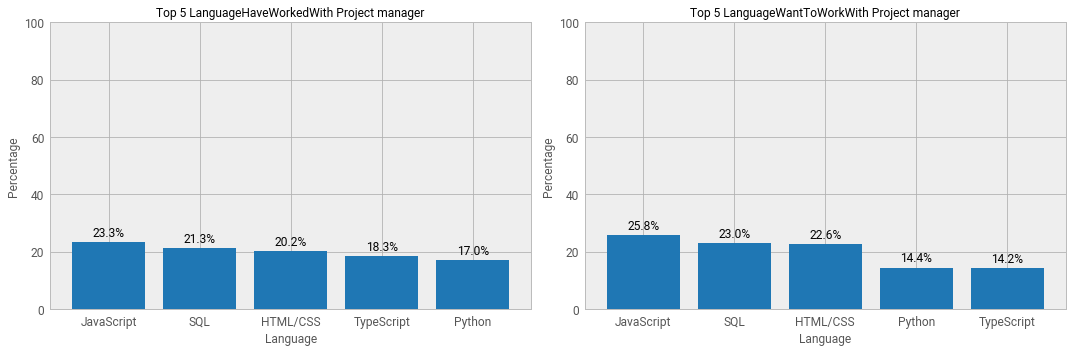

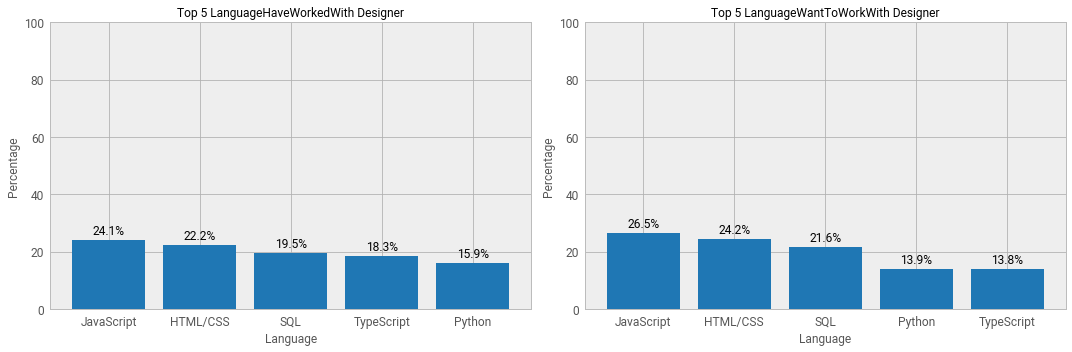

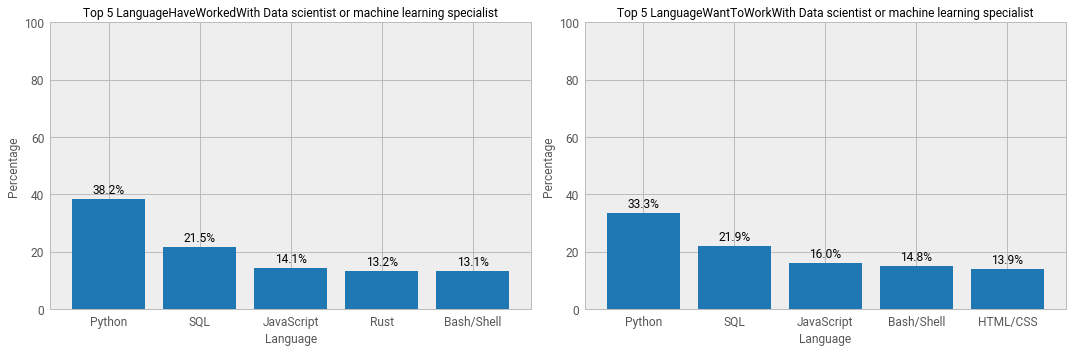

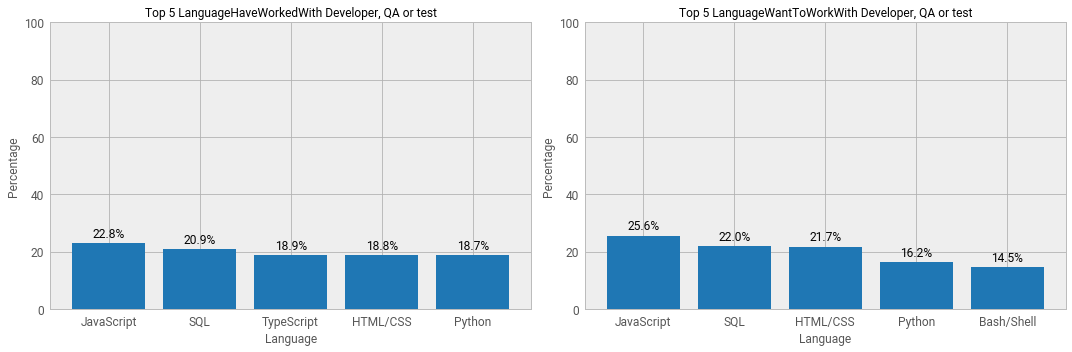

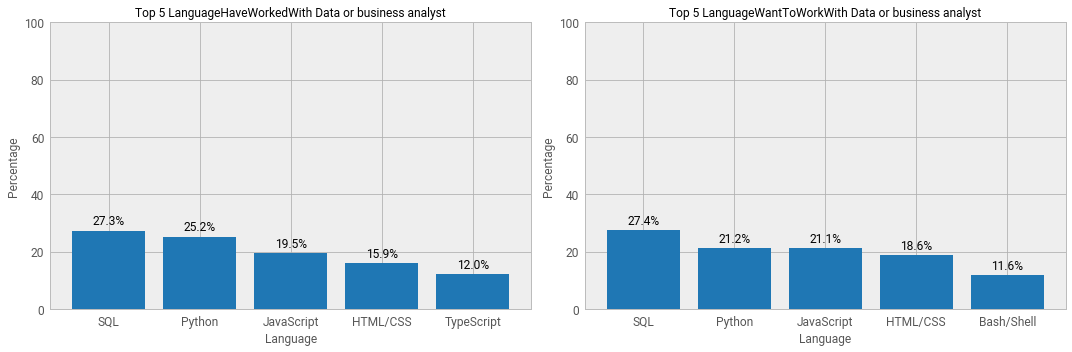

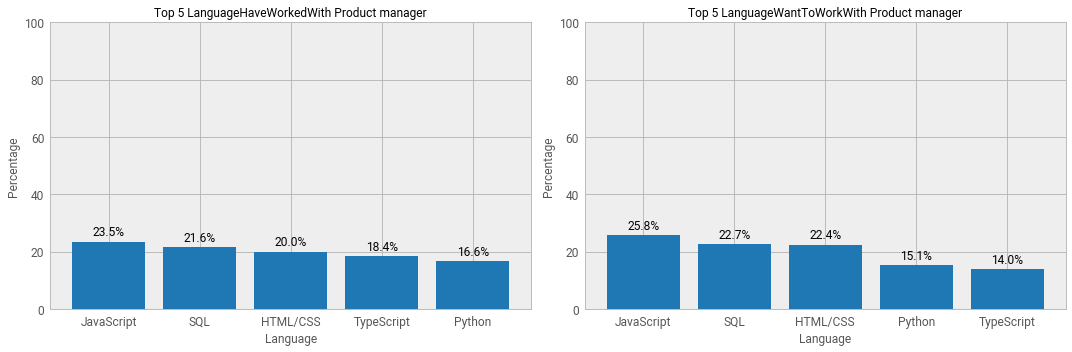

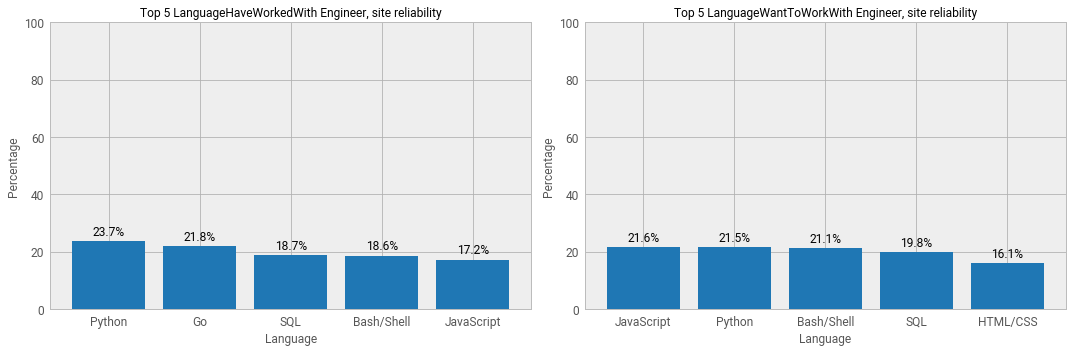

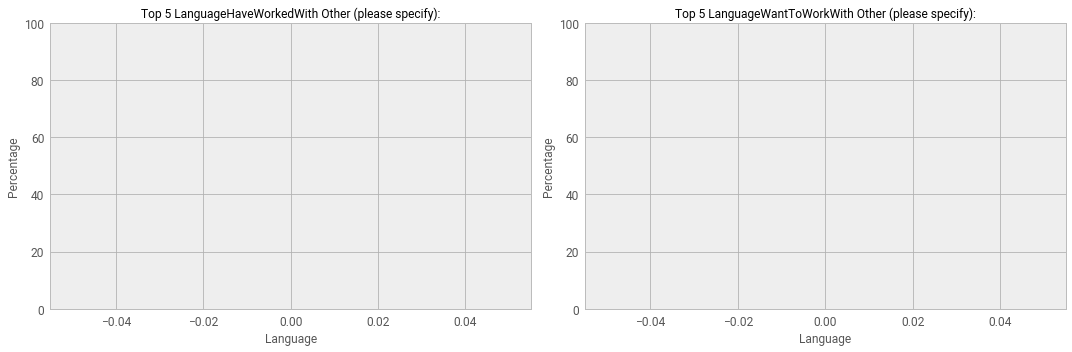

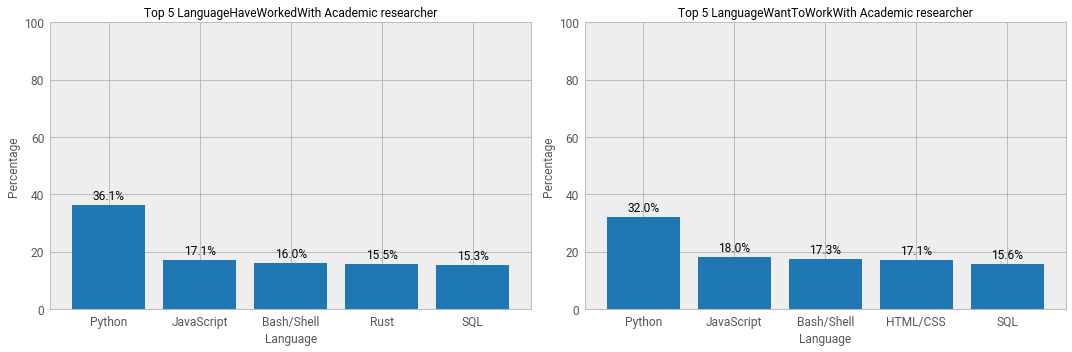

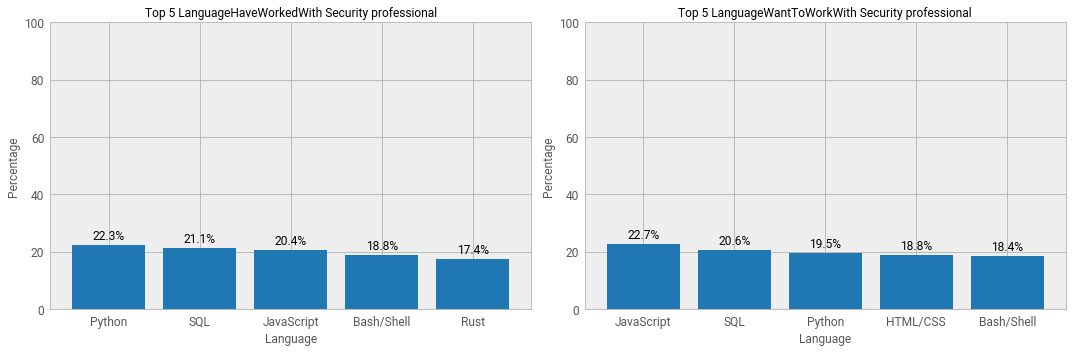

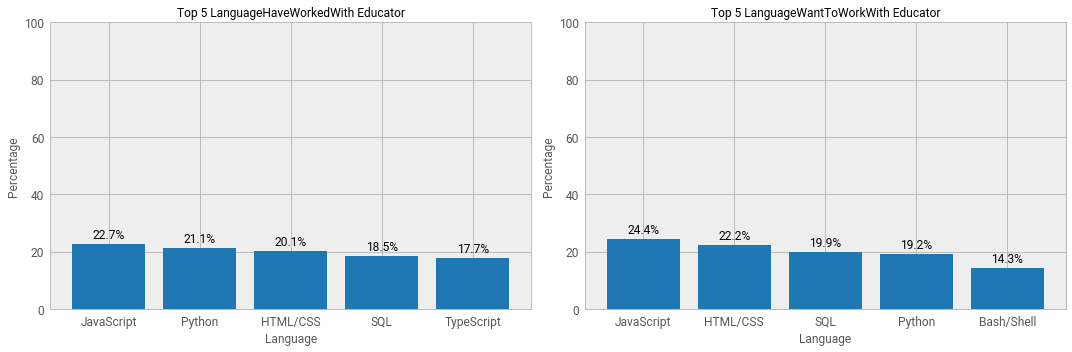

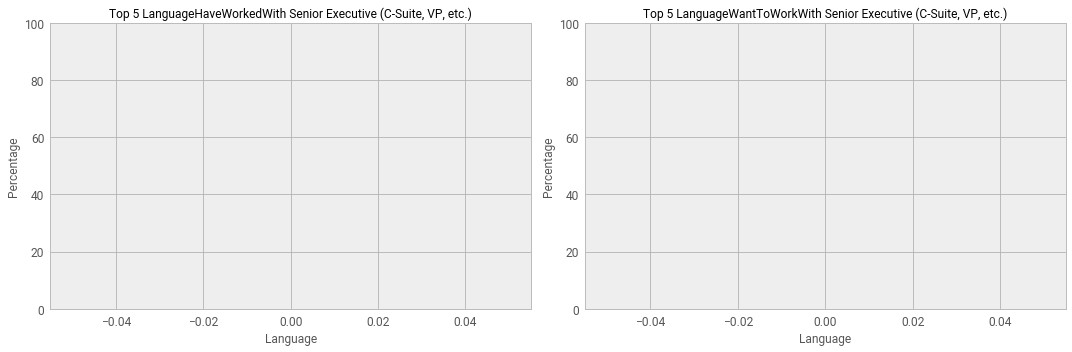

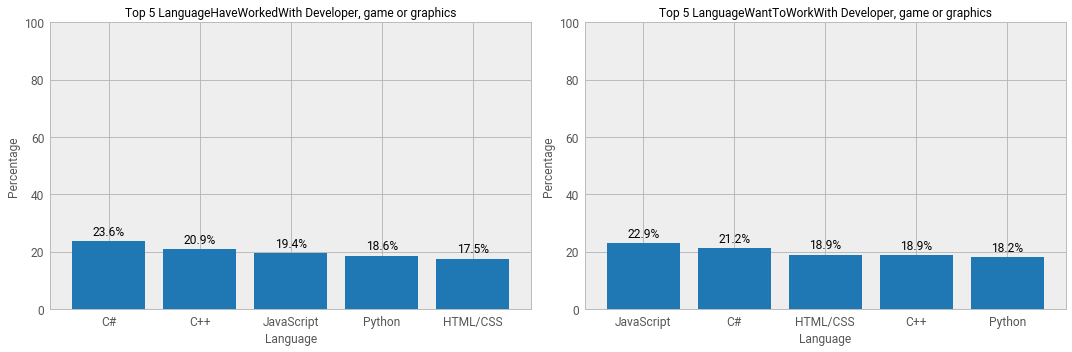

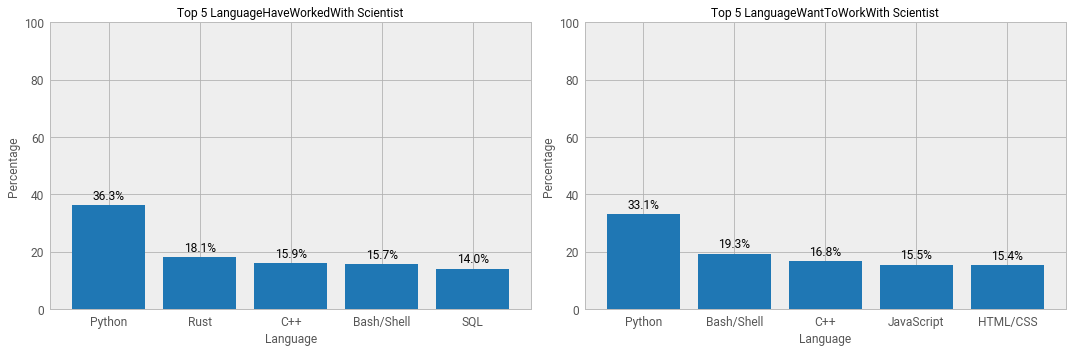

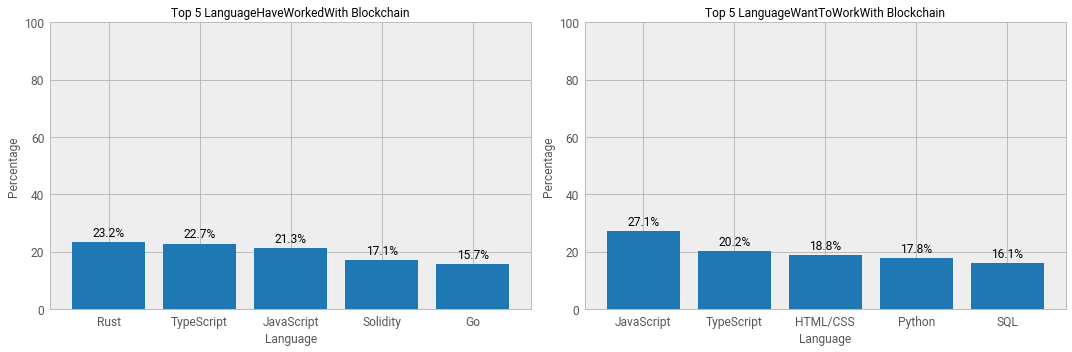

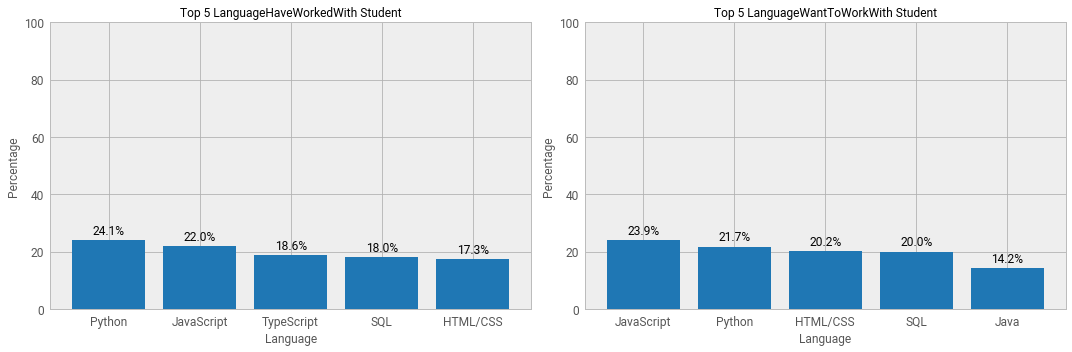

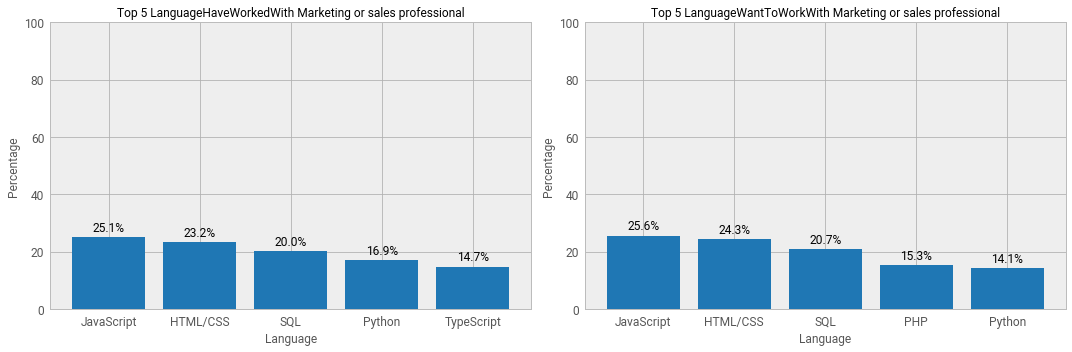

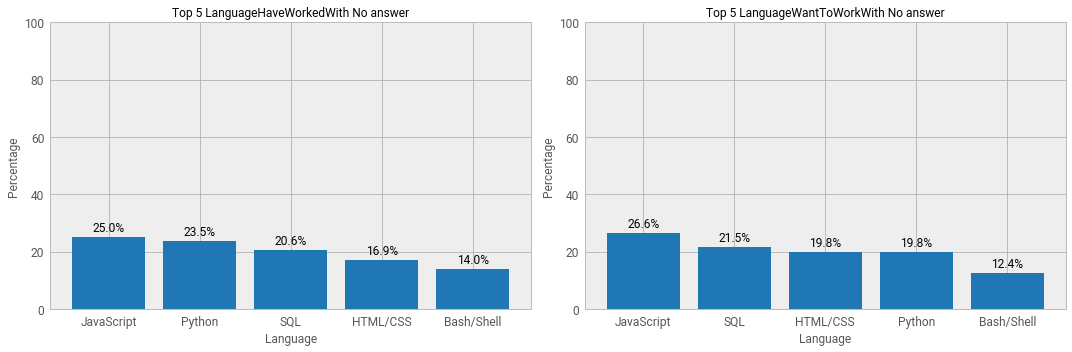

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
# list dev_type
dev_type_list = list(dev_type.dev_type)

# variable
target_col_to_show = ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']
n_largest_show = 5

df_f = df.copy()
# Split the values in selected column
df_f[target_col_to_show[0]] = df_f[target_col_to_show[0]].str.split(';')
# Split the values in selected column
df_f[target_col_to_show[1]] = df_f[target_col_to_show[1]].str.split(';')
# run the function
create_bar_charts(df_f, dev_type_list,target_col_to_show, n_largest_show)

#### Working platform

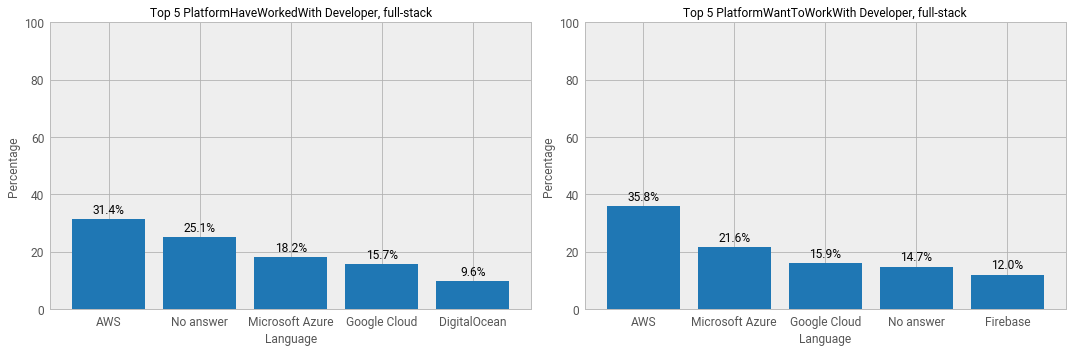

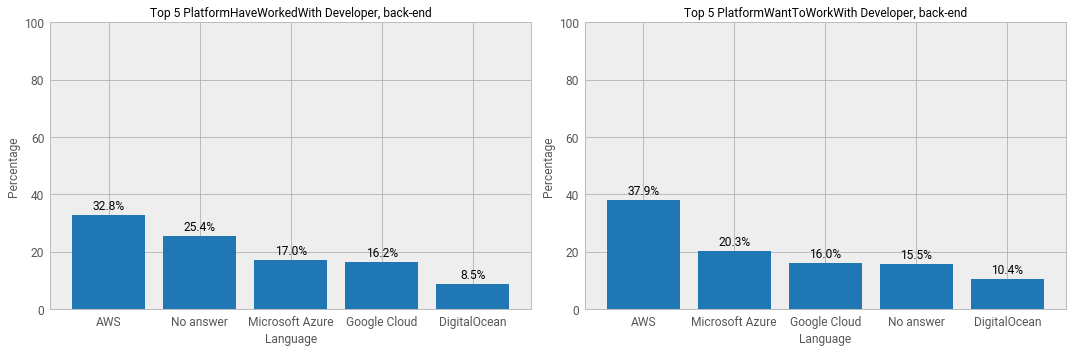

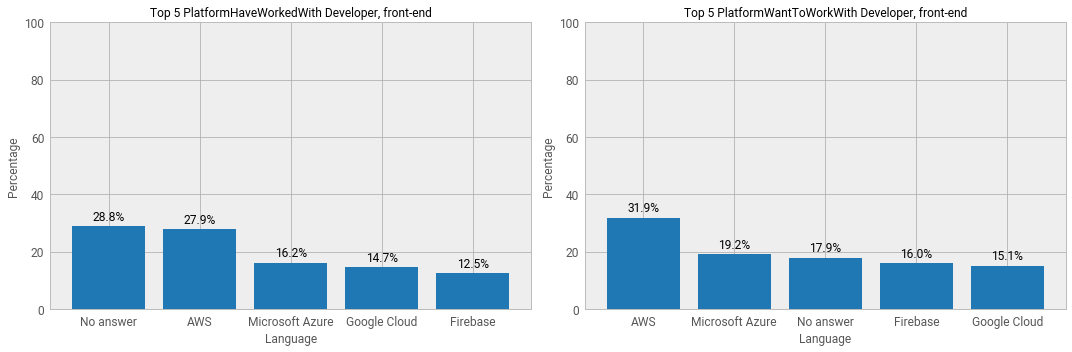

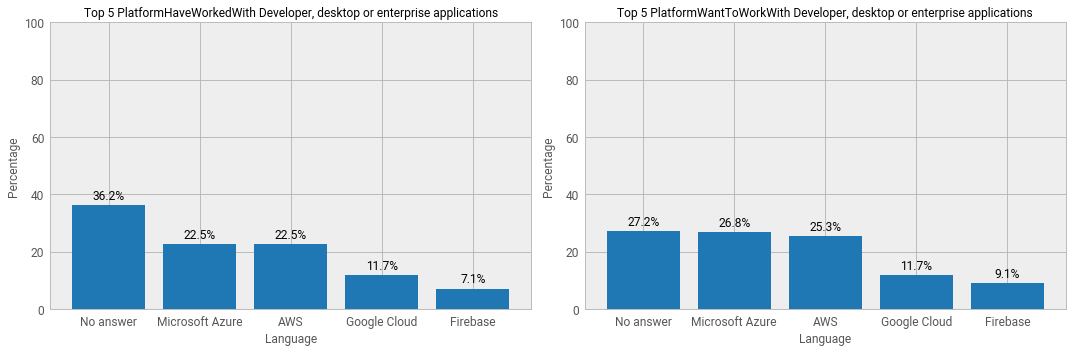

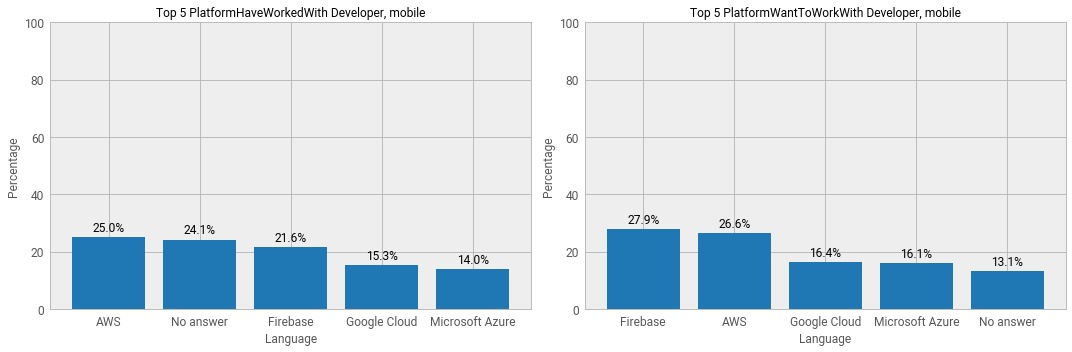

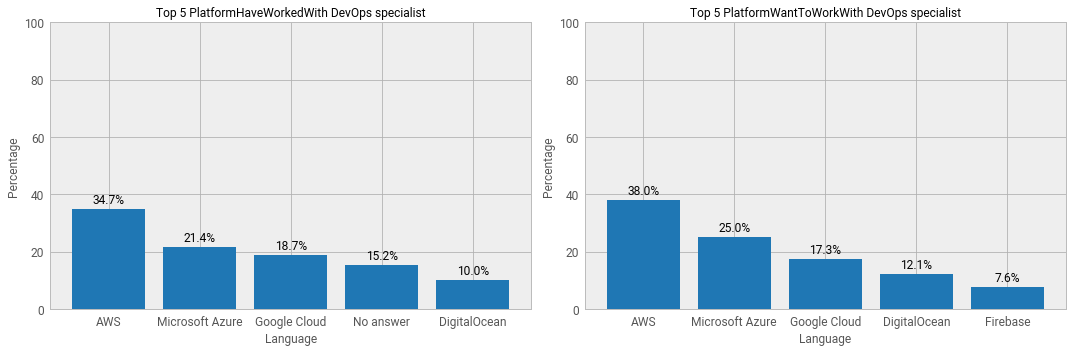

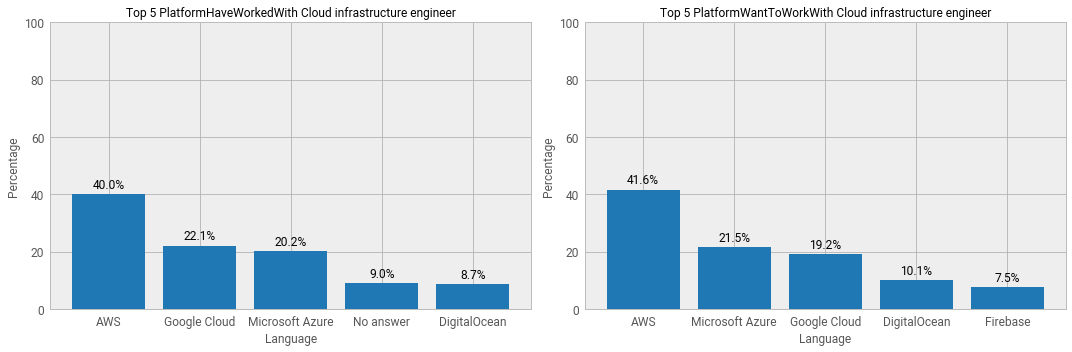

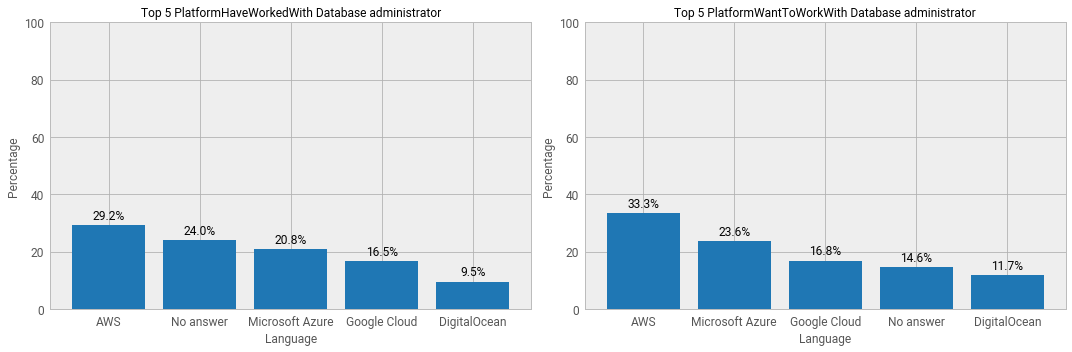

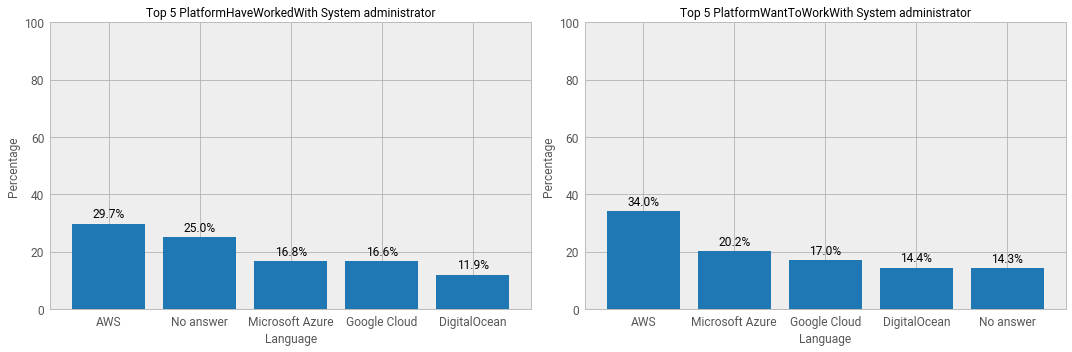

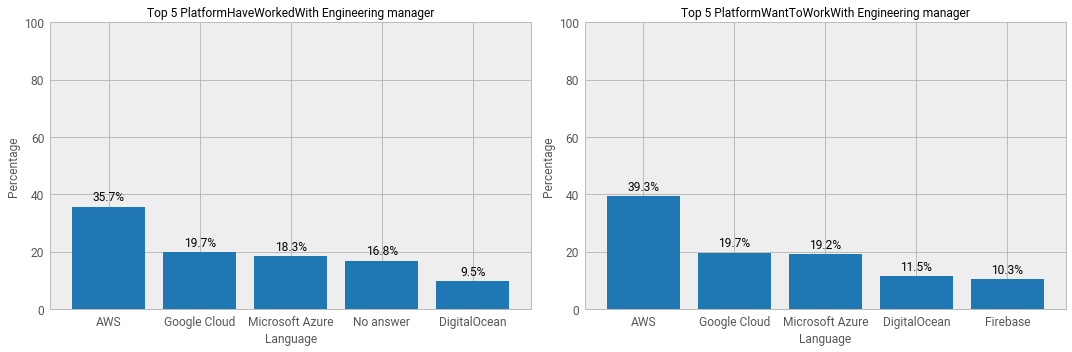

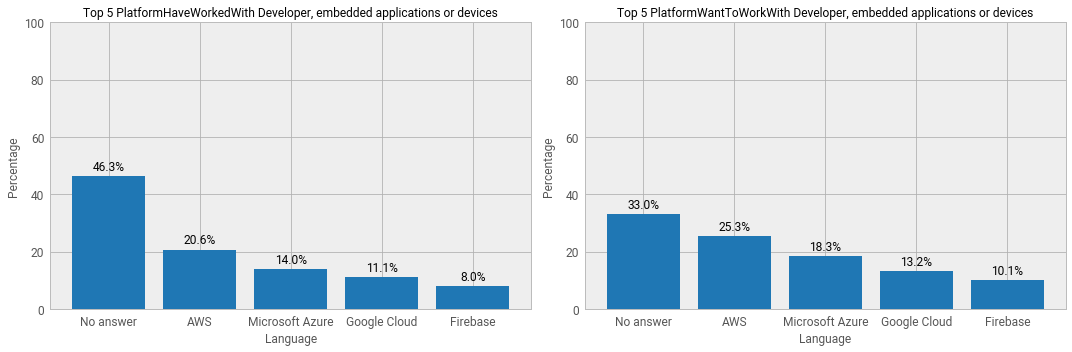

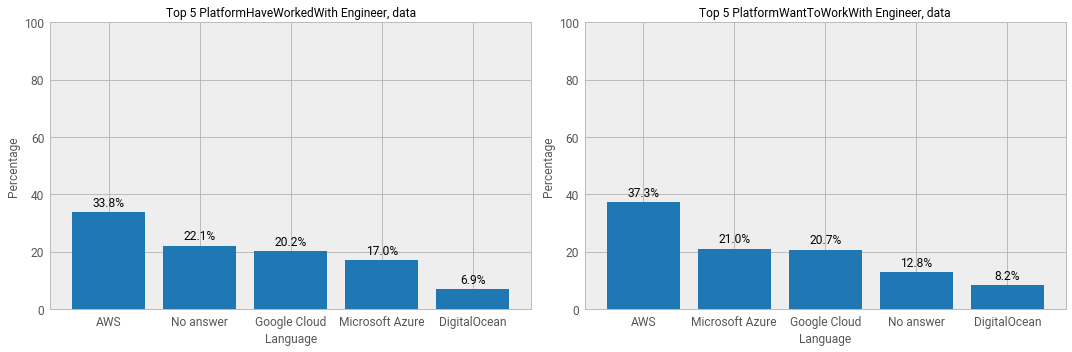

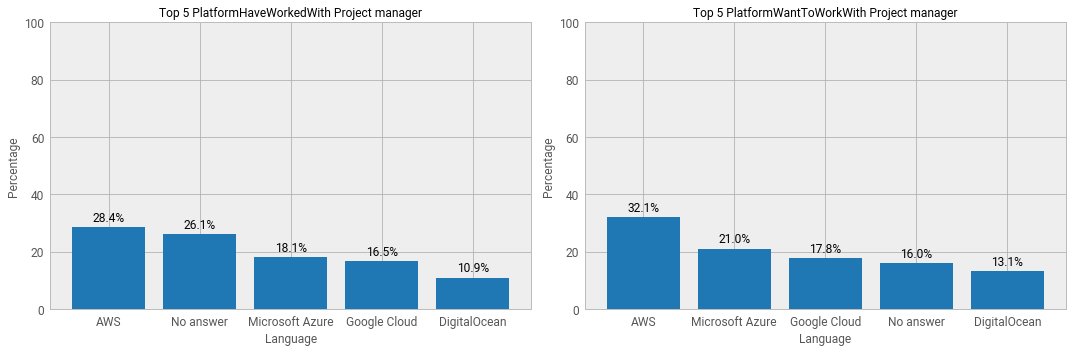

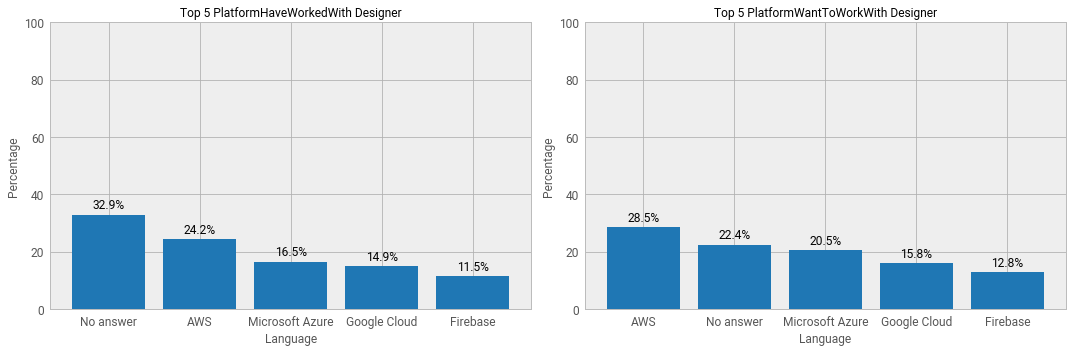

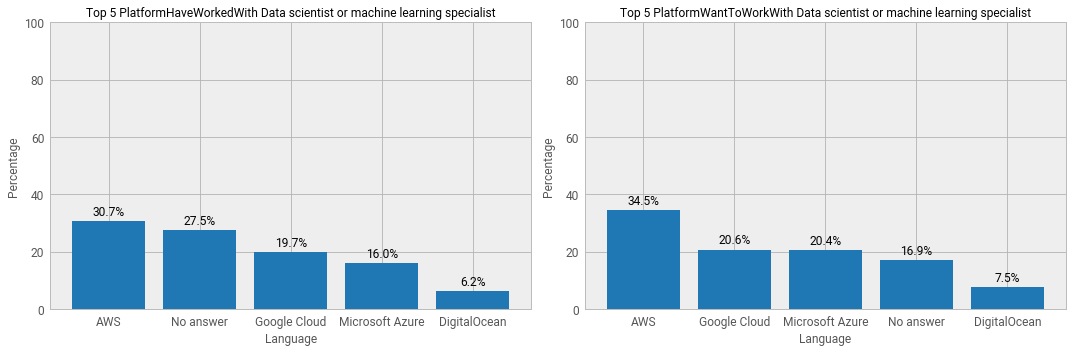

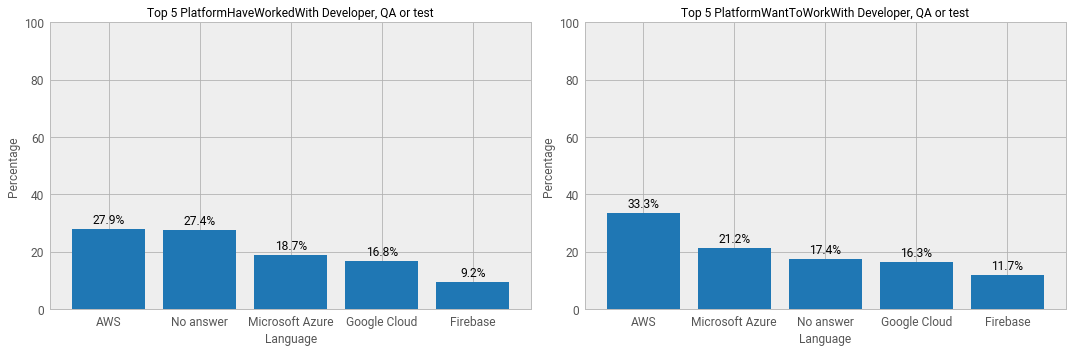

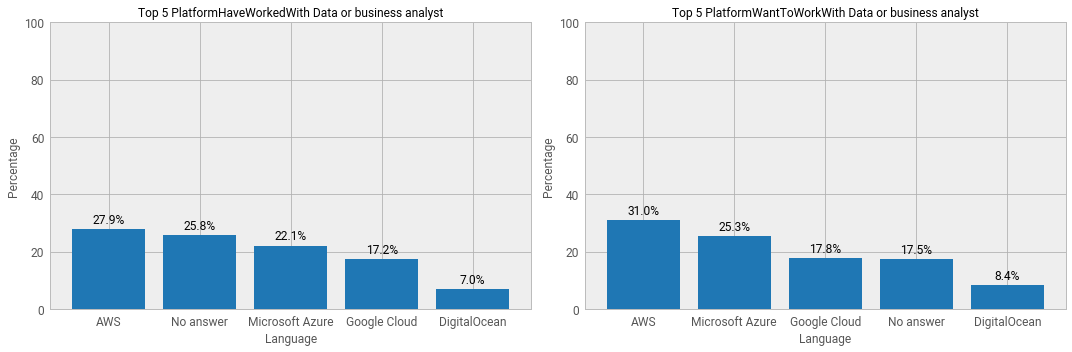

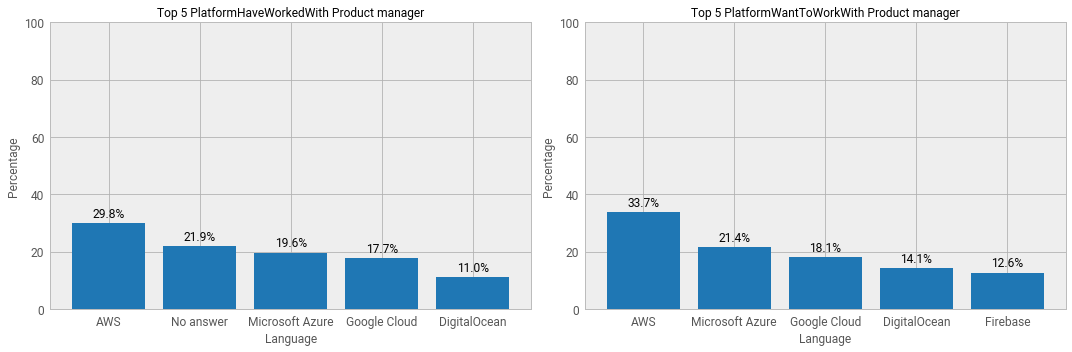

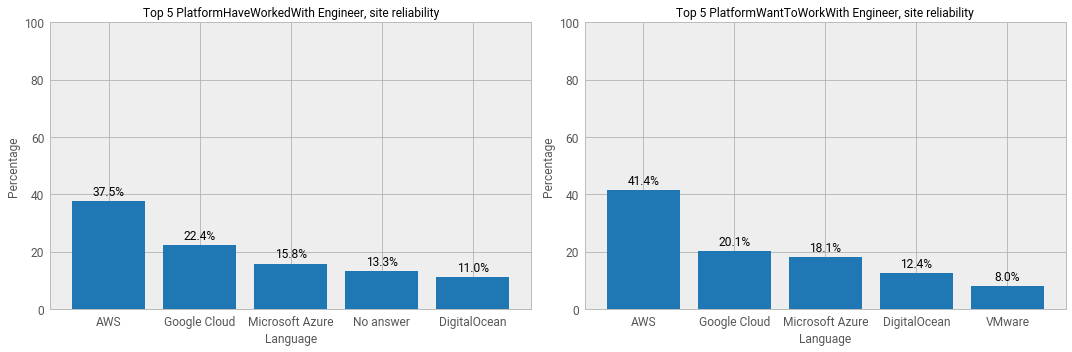

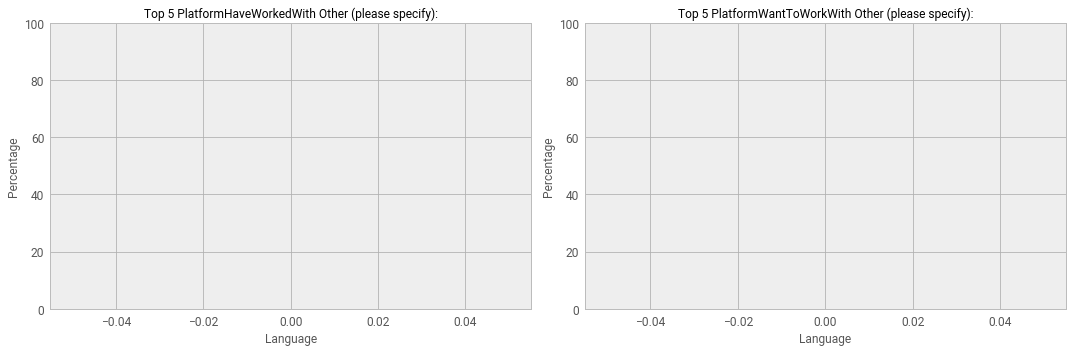

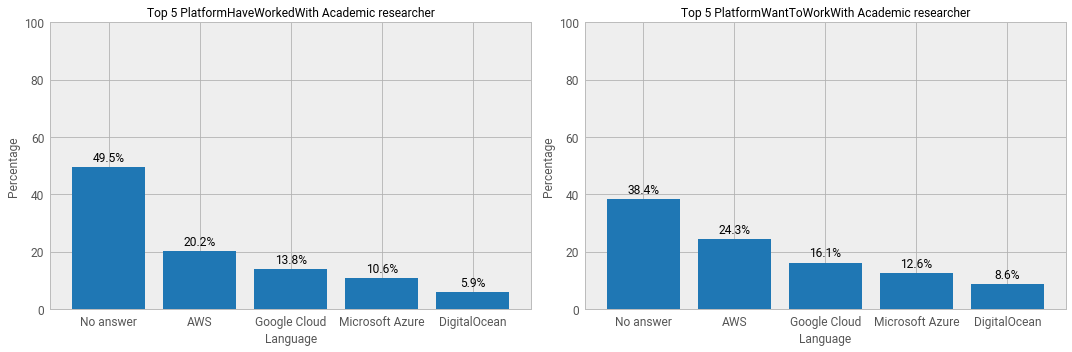

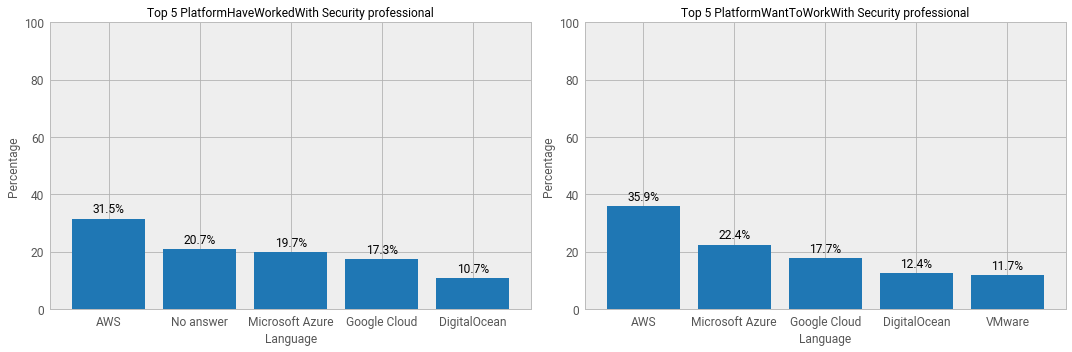

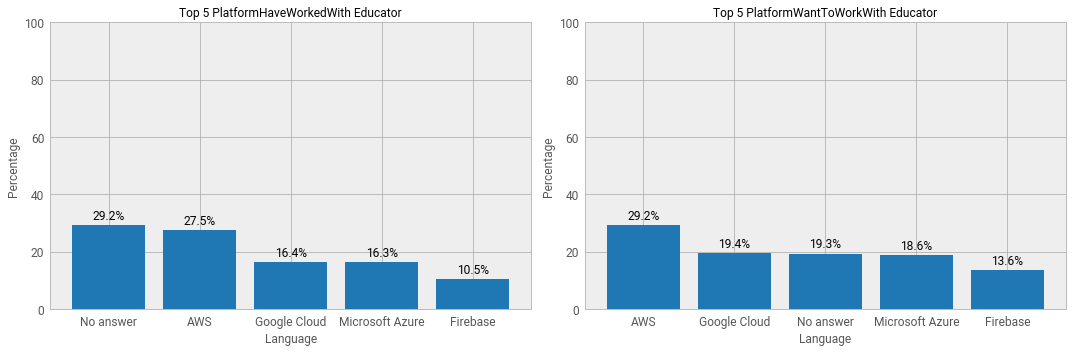

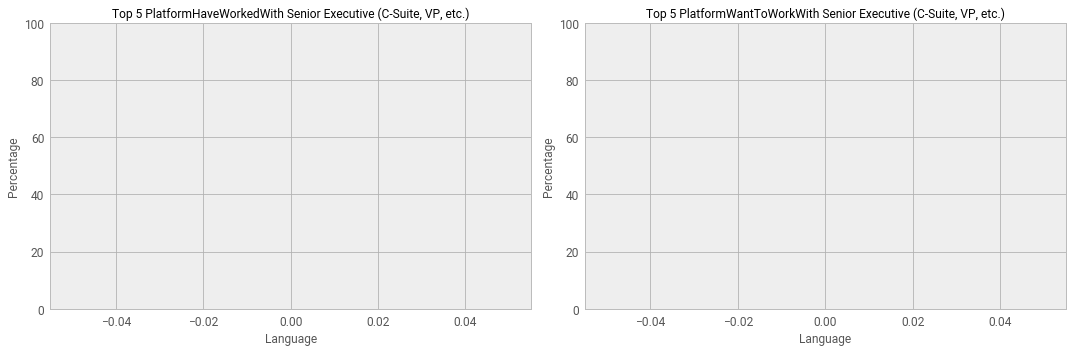

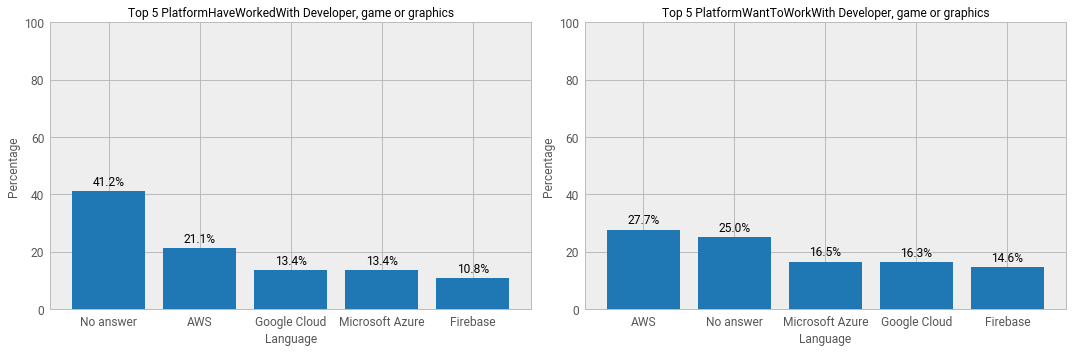

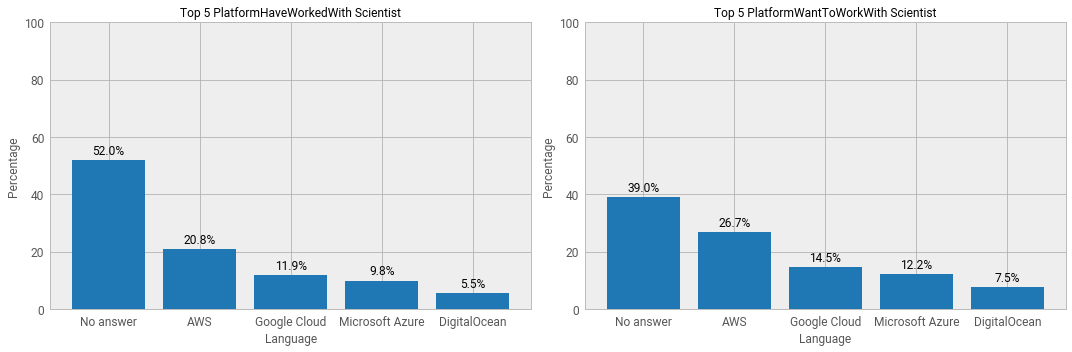

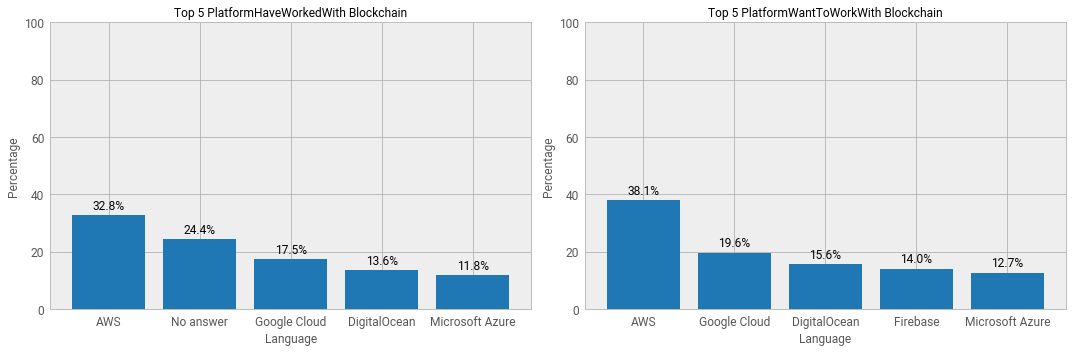

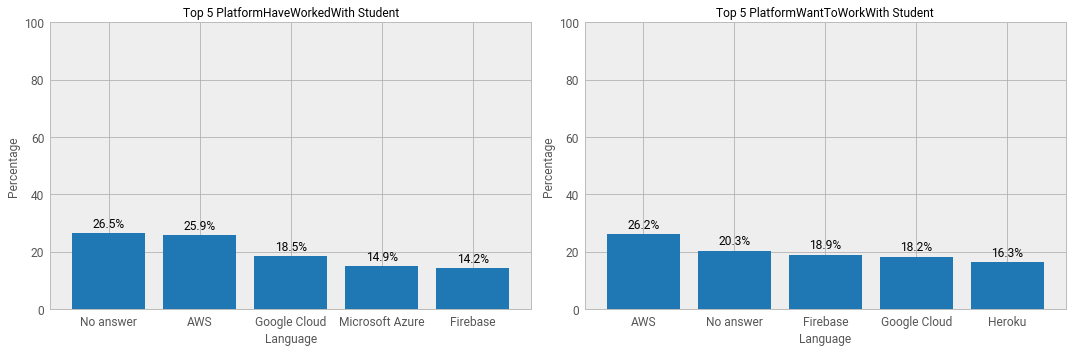

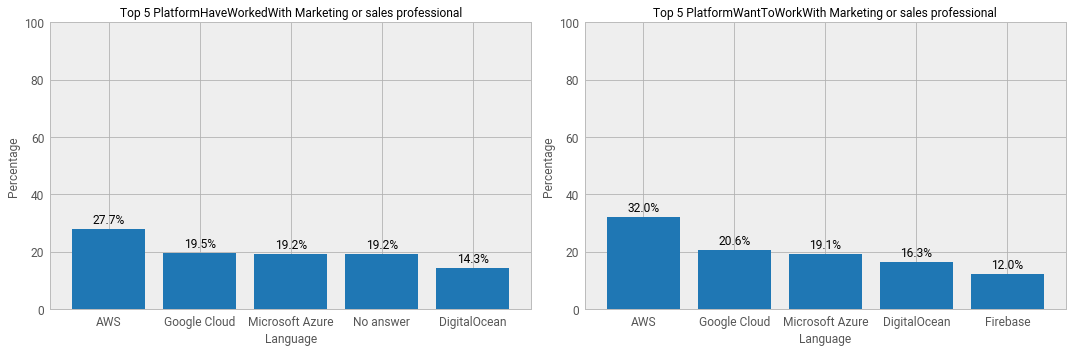

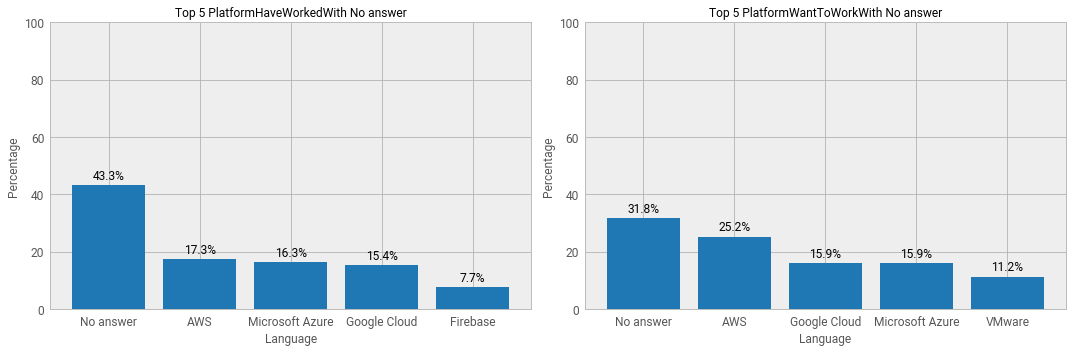

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# variable
target_col_to_show = ['PlatformHaveWorkedWith', 'PlatformWantToWorkWith']
n_largest_show = 5

df_f = df.copy()
# Split the values in selected column
df_f[target_col_to_show[0]] = df_f[target_col_to_show[0]].str.split(';')
# Split the values in selected column
df_f[target_col_to_show[1]] = df_f[target_col_to_show[1]].str.split(';')
# run the function
create_bar_charts(df_f, dev_type_list,target_col_to_show, n_largest_show)

# EOL